# Основы анализа данных в Python

*Алла Тамбовцева*

## Обработка данных, группировка и визуализация: часть 1

Импортируем необходимые библиотеки и модуль `pyplot` из графической библиотеки `matplotlib`:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Загрузим данные из Excel-файла с подробными результатами выборов 2021 года:

In [2]:
full = pd.read_excel("proportional_w_uiks_original.xlsx")

Проверим размерность датафрейма:

In [3]:
print(full.shape)

(96325, 65)


Итак, у нас есть данные по 96325 избирательным участкам. Так как столбцов тоже много, посмотрим на их названия, чтобы понять, как выбрать нужные:

In [4]:
print(full.columns)

Index(['level', 'region', 'district', 'oik', 'tik', 'uik', 'uiknum',
       'voters at opening', '15.00 day 1', '15.00_abs day 1', '20.00 day 1',
       '20.00_abs day 1', '15.00 day 2', '15.00_abs day 2', '20.00 day 2',
       '20.00_abs day 2', '10.00', '12.00', '15.00', '18.00',
       'Включено для голосования по месту нахождения',
       'Исключено на электронное голосование',
       'Исключено для голосования по месту нахождения',
       'Число избирателей, внесенных в список избирателей на момент окончания голосования',
       'Число избирательных бюллетеней, полученных участковой избирательной комиссией',
       'Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно',
       'Число избирательных бюллетеней, выданных в помещении для голосования в день голосования',
       'Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования',
       'Число погашенных избирательных бюллетеней',
       'Число избирательных бюллетеней, 

Если мы захотим получить индексы интересующих нас столбцов, объект типа `pandas Index` нужно преобразовать в список. Вспомним, как возвращаются элементы списка по индексам:

In [5]:
names = list(full.columns)

print(names.index("uik"))
print(names.index("Число недействительных избирательных бюллетеней"))

5
31


Индексы нужных столбцов нам понадобятся для отбора с помощью метода `.iloc[]`. Этот метод умеет извлекать столбцы либо по отдельным числовым индексам, либо через целочисленные срезы. Если мы захотим объединить индексы и несколько срезов, ничего не получится:

In [7]:
# IndexingError: Too many indexers
# full.iloc[:, 0, 1:6, 35:49]

В библиотеке `numpy` есть функция `r_[]`, которая как раз умеет объединять питоновские срезы (*slices*), отдельные целые числа и список целых чисел. Эта функция работает по принципу функции `c()` в языке R, которая объединяет элементы в один вектор, отсюда ее название (если запросить документацию, увидим, что функция, хотя и создает обычный массив, изначально создает объект типа `RClass`):

In [8]:
# массив целых чисел
np.r_[0, 1:6, 35:49]

array([ 0,  1,  2,  3,  4,  5, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48])

Для полноценной работы с результатами выборов нам понадобятся:

* столбцы с информацией о регионе/округе/районе/избирательной комиссии (столбцы 1-5);
* столбцы с числом зарегистрированных избирателей, действительных и недействительных бюллетеней (столбцы 23, 31, 32);
* столбцы с голосами за разные партии (столбцы 35-48);
* столбцы с координатами избирательных участков (столбцы 62-63). 

Сформируем нужные срезы и списки и подставим их в `np.r_[]`, а затем – в `iloc[]`:

In [9]:
# набор нужных индексов
np.r_[1:6, [23, 31, 32], 35:49, 62:64]

array([ 1,  2,  3,  4,  5, 23, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 62, 63])

In [10]:
# выбираем все строки (на первом месте полный срез)
# и столбцы с выбранными индексами (на втором месте)

small = full.iloc[:, np.r_[1:6, [23, 31, 32], 35:49, 62:64]]
small.head()

,region,district,oik,tik,uik,"Число избирателей, внесенных в список избирателей на момент окончания голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,"1. Политическая партия ""КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ""","2. Политическая партия ""Российская экологическая партия ""ЗЕЛЁНЫЕ""",...,"7. Политическая партия ""Российская объединенная демократическая партия ""ЯБЛОКО""","8. Всероссийская политическая партия ""ПАРТИЯ РОСТА""",9. Политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ,10. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ,"11. Политическая партия ""Гражданская Платформа""",12. Политическая партия ЗЕЛЕНАЯ АЛЬТЕРНАТИВА,"13. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ ""РОДИНА""",14. ПАРТИЯ ПЕНСИОНЕРОВ,vote_lat,vote_lon
0,Алтайский край,Алтайский край – Барнаульский,ОИК №39,Алтайская,УИК №592,385,4,174,57,2,...,0,1,2,4,0,2,0,4,51.885025,85.307478
1,Алтайский край,Алтайский край – Барнаульский,ОИК №39,Алтайская,УИК №593,1515,11,558,189,8,...,0,1,4,14,0,2,3,14,51.934707,85.326494
2,Алтайский край,Алтайский край – Барнаульский,ОИК №39,Алтайская,УИК №594,1175,7,457,157,0,...,4,1,3,13,0,2,1,14,51.930130,85.333621
3,Алтайский край,Алтайский край – Барнаульский,ОИК №39,Алтайская,УИК №595,2257,23,939,303,4,...,4,2,2,18,0,2,2,25,51.943233,85.336853
4,Алтайский край,Алтайский край – Барнаульский,ОИК №39,Алтайская,УИК №596,1924,17,826,264,3,...,5,2,4,19,0,3,2,16,51.961639,85.335227


Названия большинства столбцов длинные, давайте их переименуем. Так как первые пять названий короткие, их трогать не будем – заберем из `.columns`, для остальных столбцов создадим новый список, а затем эти части объединим через `+`:

In [11]:
old = list(small.columns)
print(old)

['region', 'district', 'oik', 'tik', 'uik', 'Число избирателей, внесенных в список избирателей на момент окончания голосования', 'Число недействительных избирательных бюллетеней', 'Число действительных избирательных бюллетеней', '1. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ"', '2. Политическая партия "Российская экологическая партия "ЗЕЛЁНЫЕ"', '3. Политическая партия ЛДПР – Либерально-демократическая партия России', '4. Политическая партия "НОВЫЕ ЛЮДИ"', '5. Всероссийская политическая партия "ЕДИНАЯ РОССИЯ"', '6. Партия СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ', '7. Политическая партия "Российская объединенная демократическая партия "ЯБЛОКО"', '8. Всероссийская политическая партия "ПАРТИЯ РОСТА"', '9. Политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ', '10. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ', '11. Политическая партия "Гражданская Платформа"', '12. Политическая партия ЗЕЛЕНАЯ АЛЬТЕРНАТИВА', '13. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "

In [12]:
new = old[0:5] + ["total", "invalid", "valid", "КПРФ", "ЗЕЛЁНЫЕ", 
                  "ЛДПР", "НЛ", "ЕР", "СР", "ЯБЛОКО", "ПАРТИЯ РОСТА", 
                  "РПСС", "КП", "ГП", "ЗЕЛЁНАЯ АЛЬТЕРНАТИВА", "РОДИНА", 
                  "ПП", "lat", "lon"]
print(new)

['region', 'district', 'oik', 'tik', 'uik', 'total', 'invalid', 'valid', 'КПРФ', 'ЗЕЛЁНЫЕ', 'ЛДПР', 'НЛ', 'ЕР', 'СР', 'ЯБЛОКО', 'ПАРТИЯ РОСТА', 'РПСС', 'КП', 'ГП', 'ЗЕЛЁНАЯ АЛЬТЕРНАТИВА', 'РОДИНА', 'ПП', 'lat', 'lon']


Записываем новые названия в атрибут `.columns`:

In [13]:
small.columns = new

Добавим столбец с явкой в абсолютных значениях:

In [14]:
# явка = недействительные + действительные 

small["turnout"] = small["invalid"] + small["valid"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Если `pandas` выдает предупреждение типа `SettingWithCopyWarning` на красном фоне, это нестрашно. Это не ошибка, это сообщение о том, что мы производим манипуляции с копиями столбцов. Особых проблем это не вызывает, более корректный с точки зрения последних версий `pandas` вариант кода выше такой:

    small.loc[:, "turnout"] = small.loc[:,"invalid"] + small.loc[:,"valid"]
    
Документация новых версий `pandas` вообще активно «пропагандирует» использование методов `.loc[]` и `.iloc[]`, так как они подразумевают выбор полноценных срезов из датафреймов. Если не хочется писать более громоздкий код и при этом видеть предупреждения, их можно глобально выключить сразу после импорта `pandas`:

    pd.set_option('chained_assignment', None)

Можем выгрузить обработанные данные в CSV-файл, чтобы потом просто загрузить их, а не проделывать все манипуляции заново.

In [15]:
small.to_csv("uiks_selected.csv")

Теперь агрегируем данные – сгруппируем строки в `small` по названию региона и вычислим сумму по всем числовым столбцам:

In [16]:
regs = small.groupby("region").sum(numeric_only=True)
regs.head()

,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,ЯБЛОКО,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП,lat,lon,turnout
region,,,,,,,,,,,,,,,,,,,,
Алтайский край,1806679,18976,720484,225860,4618,67212,45010,248971,72825,7225,1760,3957,16143,648,3483,4010,18762,93450.855055,146790.500656,739460
Амурская область,612971,8786,245872,67622,1853,36080,17927,87390,14120,1389,658,1828,5798,336,1444,1330,8097,37550.455022,93795.515870,254658
Архангельская область,877875,9386,355393,68206,3718,47143,35305,117497,40732,15496,1307,2996,3326,439,2992,4315,11921,52472.937618,35154.916991,364779
Астраханская область,725572,7850,307608,56279,1684,16833,17913,151742,38484,1918,911,2026,5362,666,1561,3811,8418,26671.218764,27288.797110,315458
Белгородская область,1226298,11532,712488,135168,5675,52374,39920,373965,49781,3989,1798,4654,10862,917,3907,5028,24450,63048.283719,46321.365256,724020


Ура! Теперь у нас есть результаты выборов по каждому региону. Единственное, при таком подходе числовые столбцы с координатами избирательных участков (`lat` и `lon`) тоже просуммировались, что смысла уже не имеет. Удалим эти столбцы (при таком агрегировании координаты отдельных участков все равно не нужны):

In [17]:
regs.drop(columns = ["lat", "lon"], inplace = True)

Обратим внимание на важную деталь – названия регионов. Так как в коде выше столбец `region` был основанием для группировки внутри `.groupby()`, значения из этого столбца записались в индексы строк (названия регионов выделены полужирным):

In [18]:
regs.head()

,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,ЯБЛОКО,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП,turnout
region,,,,,,,,,,,,,,,,,,
Алтайский край,1806679,18976,720484,225860,4618,67212,45010,248971,72825,7225,1760,3957,16143,648,3483,4010,18762,739460
Амурская область,612971,8786,245872,67622,1853,36080,17927,87390,14120,1389,658,1828,5798,336,1444,1330,8097,254658
Архангельская область,877875,9386,355393,68206,3718,47143,35305,117497,40732,15496,1307,2996,3326,439,2992,4315,11921,364779
Астраханская область,725572,7850,307608,56279,1684,16833,17913,151742,38484,1918,911,2026,5362,666,1561,3811,8418,315458
Белгородская область,1226298,11532,712488,135168,5675,52374,39920,373965,49781,3989,1798,4654,10862,917,3907,5028,24450,724020


То же было бы, если бы оснований для группировки было несколько (by the way, тоже подходящий формат для анализа, обычно уровень ТИК всех и интересует):

In [19]:
small.groupby(["region", "tik"]).sum(numeric_only=True)

total  invalid  \
region            tik                                                      
Алтайский край    Алейская                                11743      148   
                  Алейская городская                      21076      265   
                  Алтайская                               19006      216   
                  Баевская                                 7654       76   
                  Барнаул, Вторая Индустриальная          95660      659   
...                                                         ...      ...   
город Севастополь Балаклавская                            42846      405   
                  Гагаринская                            107421      725   
                  Дистанционное электронное голосование   20772        0   
                  Ленинская                               83249      738   
                  Нахимовская                             83820     1092   

                                                         valid   КПРФ  \
region            tik                                                   
Алтайский край    Алейская                                6713   1557   
                  Алейская городская                      9325   2556   
                  Алтайская                               8315   2519   
                  Баевская                                3573   1465   
                  Барнаул, Вторая Индустриальная         29960  10368   
...                                                        ...    ...   
город Севастополь Балаклавская                           19542   2293   
                  Гагаринская                            40620   6127   
                  Дистанционное электронное голосование  18621   1754   
                  Ленинская                              42560   5281   
                  Нахимовская                            40932   5390   

                                                         ЗЕЛЁНЫЕ  ЛДПР    НЛ  \
region            tik                                                          
Алтайский край    Алейская                                    32   743   213   
                  Алейская городская                          53   906   465   
                  Алтайская                                   45   821   573   
                  Баевская                                    22   311   124   
                  Барнаул, Вторая Индустриальная             307  2140  2981   
...                                                          ...   ...   ...   
город Севастополь Балаклавская                               169  1750   632   
                  Гагаринская                                620  3560  2098   
                  Дистанционное электронное голосование      814  1793  1399   
                  Ленинская                                  551  3145  1992   
                  Нахимовская                                454  3919  2636   

                                                            ЕР    СР  ЯБЛОКО  \
region            tik                                                          
Алтайский край    Алейская                                3304   465      33   
                  Алейская городская                      3855   760      65   
                  Алтайская                               3093   705      31   
                  Баевская                                1203   209      11   
                  Барнаул, Вторая Индустриальная          8707  2731     566   
...                                                        ...   ...     ...   
город Севастополь Балаклавская                           12217  1408     119   
                  Гагаринская                            22117  3574     274   
                  Дистанционное электронное голосование  10016  1560     143   
                  Ленинская                              25523  3242     320   
                  Нахимовская                            23399  2694     239   

                                     

В таком случае создаются мультииндексы, многоуровневые индексы. В примере выше индекс одной строки – это пара *регион-район*:

In [20]:
small.groupby(["region", "tik"]).sum(numeric_only=True).index[0]

('Алтайский край', 'Алейская')

В нашем случае удобнее будет, если название региона будет храниться в отдельном столбце. Перенести индексы в столбец можно с помощью метода `.reset_index()`:

In [21]:
regs.reset_index(inplace = True)
regs.head()

,region,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,ЯБЛОКО,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП,turnout
0,Алтайский край,1806679,18976,720484,225860,4618,67212,45010,248971,72825,7225,1760,3957,16143,648,3483,4010,18762,739460
1,Амурская область,612971,8786,245872,67622,1853,36080,17927,87390,14120,1389,658,1828,5798,336,1444,1330,8097,254658
2,Архангельская область,877875,9386,355393,68206,3718,47143,35305,117497,40732,15496,1307,2996,3326,439,2992,4315,11921,364779
3,Астраханская область,725572,7850,307608,56279,1684,16833,17913,151742,38484,1918,911,2026,5362,666,1561,3811,8418,315458
4,Белгородская область,1226298,11532,712488,135168,5675,52374,39920,373965,49781,3989,1798,4654,10862,917,3907,5028,24450,724020


Создадим датафрейм с процентами голосов за каждую партию. Напишем lambda-функцию, которая предполагает деление столбца `x` на столбец с явкой `turnout` и домножение результата на 100, и применим ее ко всем столбцам с `КПРФ` по `ПП` через `.apply()`:

In [23]:
regs_perc = regs.loc[:, "КПРФ":"ПП"].apply(lambda x: x / regs["turnout"] * 100)
regs_perc.head()

,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,ЯБЛОКО,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП
0,30.543910,0.624510,9.089335,6.086874,33.669299,9.848403,0.977064,0.238012,0.535120,2.183080,0.087632,0.471019,0.542288,2.537257
1,26.554045,0.727643,14.168021,7.039637,34.316613,5.544691,0.545437,0.258386,0.717825,2.276779,0.131942,0.567035,0.522269,3.179558
2,18.697897,1.019247,12.923715,9.678463,32.210462,11.166213,4.248052,0.358299,0.821319,0.911785,0.120347,0.820223,1.182908,3.268006
3,17.840410,0.533827,5.336051,5.678410,48.102125,12.199405,0.608005,0.288786,0.642241,1.699751,0.211122,0.494836,1.208085,2.668501
4,18.669098,0.783818,7.233778,5.513660,51.651197,6.875639,0.550952,0.248336,0.642800,1.500235,0.126654,0.539626,0.694456,3.376979


По-хорошему, эти столбцы нужно добавить к исходному датафрейму `regs`, чтобы у нас в одной таблице были все данные. Но тогда перед этим названия столбцов нужно изменить, иначе после объединения названия партий будут встречаться в датафрейме дважды (результаты в голосах и в процентах голосов).

Воспользуемся списковым включением – пройдемся по всем названиям в `regs_perc` и доклеим к каждому из них символ `%`:

In [24]:
regs_perc.columns = [s + "%" for s in list(regs_perc.columns)]
regs_perc.head()

,КПРФ%,ЗЕЛЁНЫЕ%,ЛДПР%,НЛ%,ЕР%,СР%,ЯБЛОКО%,ПАРТИЯ РОСТА%,РПСС%,КП%,ГП%,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА%,РОДИНА%,ПП%
0,30.543910,0.624510,9.089335,6.086874,33.669299,9.848403,0.977064,0.238012,0.535120,2.183080,0.087632,0.471019,0.542288,2.537257
1,26.554045,0.727643,14.168021,7.039637,34.316613,5.544691,0.545437,0.258386,0.717825,2.276779,0.131942,0.567035,0.522269,3.179558
2,18.697897,1.019247,12.923715,9.678463,32.210462,11.166213,4.248052,0.358299,0.821319,0.911785,0.120347,0.820223,1.182908,3.268006
3,17.840410,0.533827,5.336051,5.678410,48.102125,12.199405,0.608005,0.288786,0.642241,1.699751,0.211122,0.494836,1.208085,2.668501
4,18.669098,0.783818,7.233778,5.513660,51.651197,6.875639,0.550952,0.248336,0.642800,1.500235,0.126654,0.539626,0.694456,3.376979


Теперь можно спокойно склеить два датафрейма по столбцам (`axis = 1`):

In [25]:
regs_full = pd.concat([regs, regs_perc], axis = 1)
regs_full.head()

,region,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,...,ЕР%,СР%,ЯБЛОКО%,ПАРТИЯ РОСТА%,РПСС%,КП%,ГП%,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА%,РОДИНА%,ПП%
0,Алтайский край,1806679,18976,720484,225860,4618,67212,45010,248971,72825,...,33.669299,9.848403,0.977064,0.238012,0.535120,2.183080,0.087632,0.471019,0.542288,2.537257
1,Амурская область,612971,8786,245872,67622,1853,36080,17927,87390,14120,...,34.316613,5.544691,0.545437,0.258386,0.717825,2.276779,0.131942,0.567035,0.522269,3.179558
2,Архангельская область,877875,9386,355393,68206,3718,47143,35305,117497,40732,...,32.210462,11.166213,4.248052,0.358299,0.821319,0.911785,0.120347,0.820223,1.182908,3.268006
3,Астраханская область,725572,7850,307608,56279,1684,16833,17913,151742,38484,...,48.102125,12.199405,0.608005,0.288786,0.642241,1.699751,0.211122,0.494836,1.208085,2.668501
4,Белгородская область,1226298,11532,712488,135168,5675,52374,39920,373965,49781,...,51.651197,6.875639,0.550952,0.248336,0.642800,1.500235,0.126654,0.539626,0.694456,3.376979


В завершение подготовки данных к дальнейшей работе добавим столбец с явкой в процентах:

In [26]:
regs_full["turnout%"] = regs["turnout"] / regs["total"] * 100

И столбец `winner` с названием партии, которая победила в регионе (набрала максимум):

In [27]:
# выбраем столбцы с голосами через .loc
# метод .idxmax() с axis = 1 возвращает название столбца,
# где в строке достигается максимум

regs_full["winner"] = regs_full.loc[:, "КПРФ":"ПП"].idxmax(axis = 1)

Выгрузим обновленный датафрейм в CSV-файл:

In [28]:
regs_full.to_csv("regions_with_perc.csv")

Допустим, нас интересуют те регионы, где большинство голосов набрала КПРФ. Посмотрим, сколько таких:

In [29]:
regs_full["winner"].value_counts()

ЕР      81
КПРФ     4
Name: winner, dtype: int64

Узнаем, что это за регионы – отфильтруем строки:

In [30]:
regs_kp = regs_full[regs_full["winner"] == "КПРФ"]
regs_kp

,region,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,...,ЯБЛОКО%,ПАРТИЯ РОСТА%,РПСС%,КП%,ГП%,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА%,РОДИНА%,ПП%,turnout%,winner
31,Ненецкий автономный округ,36107,383,14994,4917,307,1720,996,4469,1226,...,0.786890,0.396696,0.708851,1.580282,0.091045,1.053521,1.203096,3.017494,42.587310,КПРФ
52,Республика Марий Эл,531951,5969,239260,89018,1715,19481,15085,81969,15896,...,0.571303,0.310730,0.519514,1.207851,0.119480,0.519922,0.673656,2.641205,46.099923,КПРФ
54,Республика Саха (Якутия),659338,6949,330715,118683,2455,17354,33317,112160,27643,...,1.046603,0.178284,0.556174,1.271975,0.240476,0.489244,0.339094,1.535550,51.212580,КПРФ
74,Хабаровский край,970356,13714,415188,113691,4821,69415,33127,105112,27690,...,1.104681,0.500347,3.260652,1.747719,0.146420,0.939142,0.865233,5.735576,44.200479,КПРФ


Чтобы исследовать распределение процента голосов за разные партии и явку в этих регионах, нужно перейти от сгруппированных данных к исходным, с детализацией до УИКа. А значит, нужно из датафрейма `small` выбрать те строки, которые соответствуют названиям в `region` выше.

Столбец `region` – это объект *pandas Series*:

In [31]:
regs_kp["region"]

31    Ненецкий автономный округ
52          Республика Марий Эл
54     Республика Саха (Якутия)
74             Хабаровский край
Name: region, dtype: object

Чтобы из него выбрать только названия, извлечем значения из соответствующего атрибута:

In [32]:
comm = regs_kp["region"].values
print(comm)

['Ненецкий автономный округ' 'Республика Марий Эл'
 'Республика Саха (Якутия)' 'Хабаровский край']


А теперь выберем строки из `small`, где название региона входит в список `comm`:

In [33]:
# метод .isin() возвращает True, если значение входит в список,
# и False – иначе, а далее обычная фильтрация

small_kp = small[small["region"].isin(comm)]
small_kp.head()

,region,district,oik,tik,uik,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,...,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП,lat,lon,turnout
34949,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №1,269,2,135,25,4,...,0,2,3,0,3,4,3,67.877634,44.154037,137
34950,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №10,105,1,60,16,1,...,0,0,0,0,0,1,0,66.610474,47.964736,61
34951,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №11,103,1,45,8,0,...,0,0,2,0,0,1,1,66.481738,48.245897,46
34952,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №12,53,0,22,4,1,...,0,0,1,0,0,0,1,66.893040,47.611543,22
34953,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №13,37,1,19,2,0,...,0,0,1,0,0,0,0,67.132508,47.772056,20


Так как мы вернулись к исходным данным, столбцов с процентами голосов здесь нет. Добавим их по изученной ранее схеме:

In [34]:
small_kp_perc = small_kp.loc[:, "КПРФ":"ПП"].apply(lambda x: x / small_kp["turnout"] * 100)
small_kp_perc.columns = [s + "%" for s in list(small_kp_perc.columns)]
kp_full = pd.concat([small_kp, small_kp_perc], axis = 1)
kp_full.head()

,region,district,oik,tik,uik,total,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,...,ЕР%,СР%,ЯБЛОКО%,ПАРТИЯ РОСТА%,РПСС%,КП%,ГП%,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА%,РОДИНА%,ПП%
34949,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №1,269,2,135,25,4,...,37.956204,5.839416,2.919708,0.0,1.459854,2.189781,0.0,2.189781,2.919708,2.189781
34950,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №10,105,1,60,16,1,...,52.459016,4.918033,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.639344,0.000000
34951,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №11,103,1,45,8,0,...,36.956522,6.521739,2.173913,0.0,0.000000,4.347826,0.0,0.000000,2.173913,2.173913
34952,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №12,53,0,22,4,1,...,54.545455,0.000000,0.000000,0.0,0.000000,4.545455,0.0,0.000000,0.000000,4.545455
34953,Ненецкий автономный округ,Ненецкий автономный округ – Ненецкий,ОИК №221,Заполярная,УИК №13,37,1,19,2,0,...,40.000000,30.000000,0.000000,0.0,0.000000,5.000000,0.0,0.000000,0.000000,0.000000


Прежде, чем приступать к визуализации, сохраним данные по каждому региону в `kp_full` в отдельные файлы. C датафреймом `small` можно сделать то же самое, тогда будут файлы для всех 85 регионов. 

Мы уже обсуждали, что внутри объекта, возвращаемого `.groupby()`, хранятся пары *название группы-строки, соответствующие группе* (раскомментируйте строку ниже, чтобы убедиться). Этим фактом можно воспользоваться для того, чтобы «разобрать» датафрейм `kp_full` на части.

In [ ]:
#print(*kp_full.groupby("region"))

Пройдем в цикле по всем парам (первый элемент – название региона, второй – датафрейм для этого региона) и экспортируем данные в CSV-файлы:

In [35]:
# index = False, чтобы не выгружались номера строк,
# это то, откуда берутся столбцы типа Unnamed : 0 после загрузки CSV

for name, table in kp_full.groupby("region"):
    table.to_csv(name + ".csv", index = False) # to_excel()

Теперь в рабочей папке (где лежит текущий ipynb-файл) есть четыре CSV-файла, один для каждого региона, где победила КПРФ.

## Часть 2: группировка и визуализация

После группировки можно выбрать интересующий нас столбец (он будет выбран из каждого датафрейма, соответствующего каждой группе) и применить к нему методы для описания:

In [36]:
# число значений, минимум или максимум для процента голосов за КПРФ

print(kp_full.groupby("region")["КПРФ%"].count())
print(kp_full.groupby("region")["КПРФ%"].min())
print(kp_full.groupby("region")["КПРФ%"].max())

region
Ненецкий автономный округ     55
Республика Марий Эл          521
Республика Саха (Якутия)     822
Хабаровский край             801
Name: КПРФ%, dtype: int64
region
Ненецкий автономный округ    4.166667
Республика Марий Эл          7.142857
Республика Саха (Якутия)     0.000000
Хабаровский край             0.000000
Name: КПРФ%, dtype: float64
region
Ненецкий автономный округ    54.621849
Республика Марий Эл          68.978805
Республика Саха (Якутия)     68.421053
Хабаровский край             56.250000
Name: КПРФ%, dtype: float64


А можно с таким же успехом применить метод для визуализации. Например, метод `.hist()` для построения гистограммы по группам:

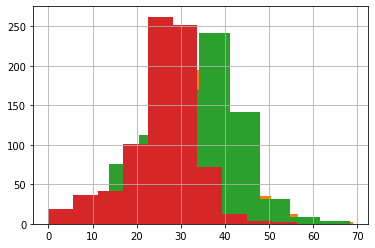

In [37]:
kp_full.groupby("region")["КПРФ%"].hist();

Что произошло? Гистограммы были построены для каждого из четырех регионов отдельно, но в одних осях. А так как распределения похожи, гистограммы просто наложились друг на друга. Попробуем добавить прозрачность:

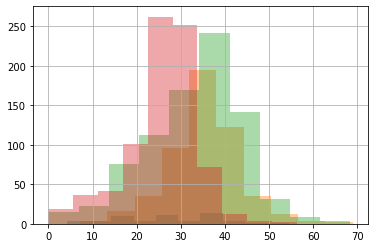

In [38]:
# интенсивность заливки 40% (прозрачность 60%)

kp_full.groupby("region")["КПРФ%"].hist(alpha = 0.4);

Все равно выглядит не очень (но иногда получается хорошо, если групп мало и распределения довольно разные). Можем попробовать перейти к графикам плотности (*kernel density estimation*, оценка плотности путем [ядерного сглаживания](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8)):

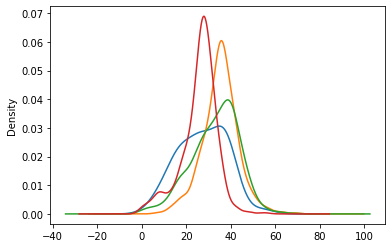

In [39]:
kp_full.groupby("region")["КПРФ%"].plot.kde();

Так как в примерах выше мы сначала выбираем столбец, а потом строим графики, доступа к другим данным в датафрейме у метода `.hist()` нет. Попробуем применить `.hist()` сразу к результату группировки, а затем внутри этого метода указать название нужного столбца:

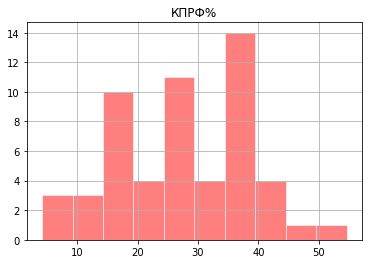

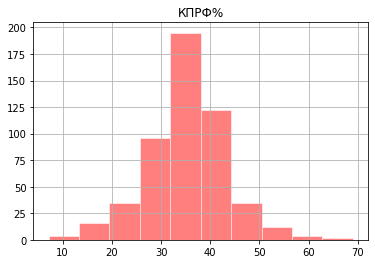

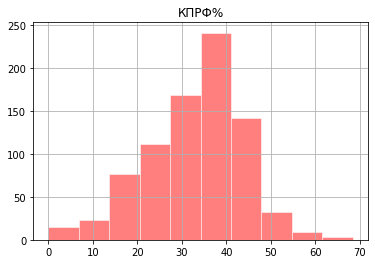

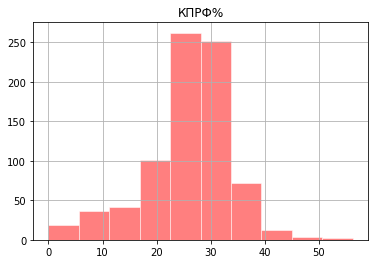

In [40]:
# color – цвет заливки, edgecolor – цвет границ столбцов

kp_full.groupby("region").hist("КПРФ%", 
                               color = "red", 
                               edgecolor = "white",
                               alpha = 0.5);

Уже лучше, каждая гистограмма сейчас в отдельном окне, в отдельных осях. Однако все графики просто идут друг за другом с новой строки (и нигде не указано, где какой регион). Логичнее было бы эти графики как-то сгруппировать, например, расположить на сетке из двух строк и двух столбцов, для компактности.

Этого можно достичь, если группировку выполнить прямо внутри метода `.hist()`, указав основание группировки в аргументе `by`:

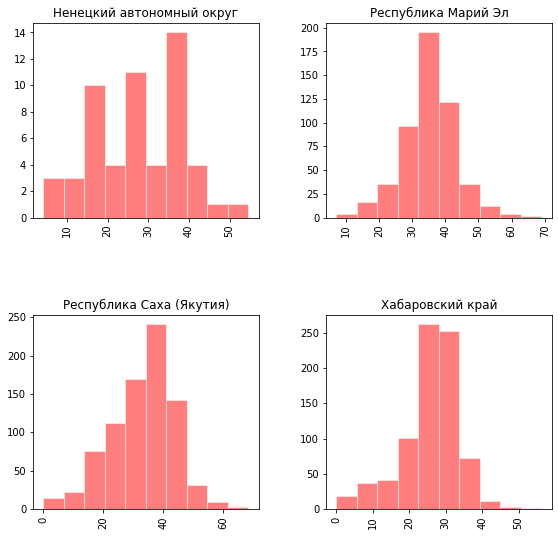

In [41]:
# здесь же можно сделать график побольше,
# в figsize укажем размер 9 на 9 дюймов

kp_full.hist("КПРФ%", 
             by = "region", 
             color = "red", 
             edgecolor = "white", 
             alpha = 0.5, 
             figsize = (9, 9));

Выглядит вполне разумно. Однако, если мы захотим применять разные настройки к разным графикам внутри изображения выше, придется обращаться к возможностям библиотеки `matplotlib` и разбираться с каждым «окном» отдельно (ну, или перейти к [библиотеке](https://seaborn.pydata.org/examples/index.html) `seaborn`, но там тоже в какой-то момент может пригодиться навык разбора графиков на части, поскольку это `seaborn` – надстройка над `matplotlib`, в которой добавили удобные функции, чтобы стать *user-friendly*).

Из каких частей состоит изображение выше? Из самой картинки со всеми четырьмя графиками и из четырех наборов осей. У каждого набора осей есть заголовок (название региона) и график внутри (гистограмма по отобранным данным). Давайте разберемся, как эти элементы получить отдельно. Для этого сохраним результат группировки в переменную `grouped`:

In [42]:
grouped = kp_full.groupby("region")
grouped

Хотя объект `grouped` от нас скрыт и временно хранится в какой-то ячейке памяти, на нем определены методы и атрибуты, которые позволяют извлечь отдельные элементы. Так, в атрибуте `.groups` хранится словарь, где ключами являются названия групп, а значениями – массив индексов строк в датафрейме `kp_full`, которые относятся к каждой группе. 

In [43]:
# grouped.groups

Если из этого словаря забрать ключи, мы получим набор названий групп, который можно использовать в качестве заголовков графиков или для отбора соответствующих строк:

In [44]:
grouped.groups.keys()

dict_keys(['Ненецкий автономный округ', 'Республика Марий Эл', 'Республика Саха (Якутия)', 'Хабаровский край'])

А для выбора строк из объекта типа `GroupBy` есть метод `.get_group()`:

In [46]:
# из набора пар регион-датафрейм
# выбираем датафрейм для региона "Ненецкий автономный округ"

#grouped.get_group("Ненецкий автономный округ")

Идеально. Получается, у нас есть возможность выбирать каждую группу отдельно, а также фиксировать ее название в виде строки. Это пригодится для построения графиков.

Теперь перейдем непосредственно к графикам. Воспользуемся функцией `subplots()`, которая возвращает пару *изображение–набор осей*:

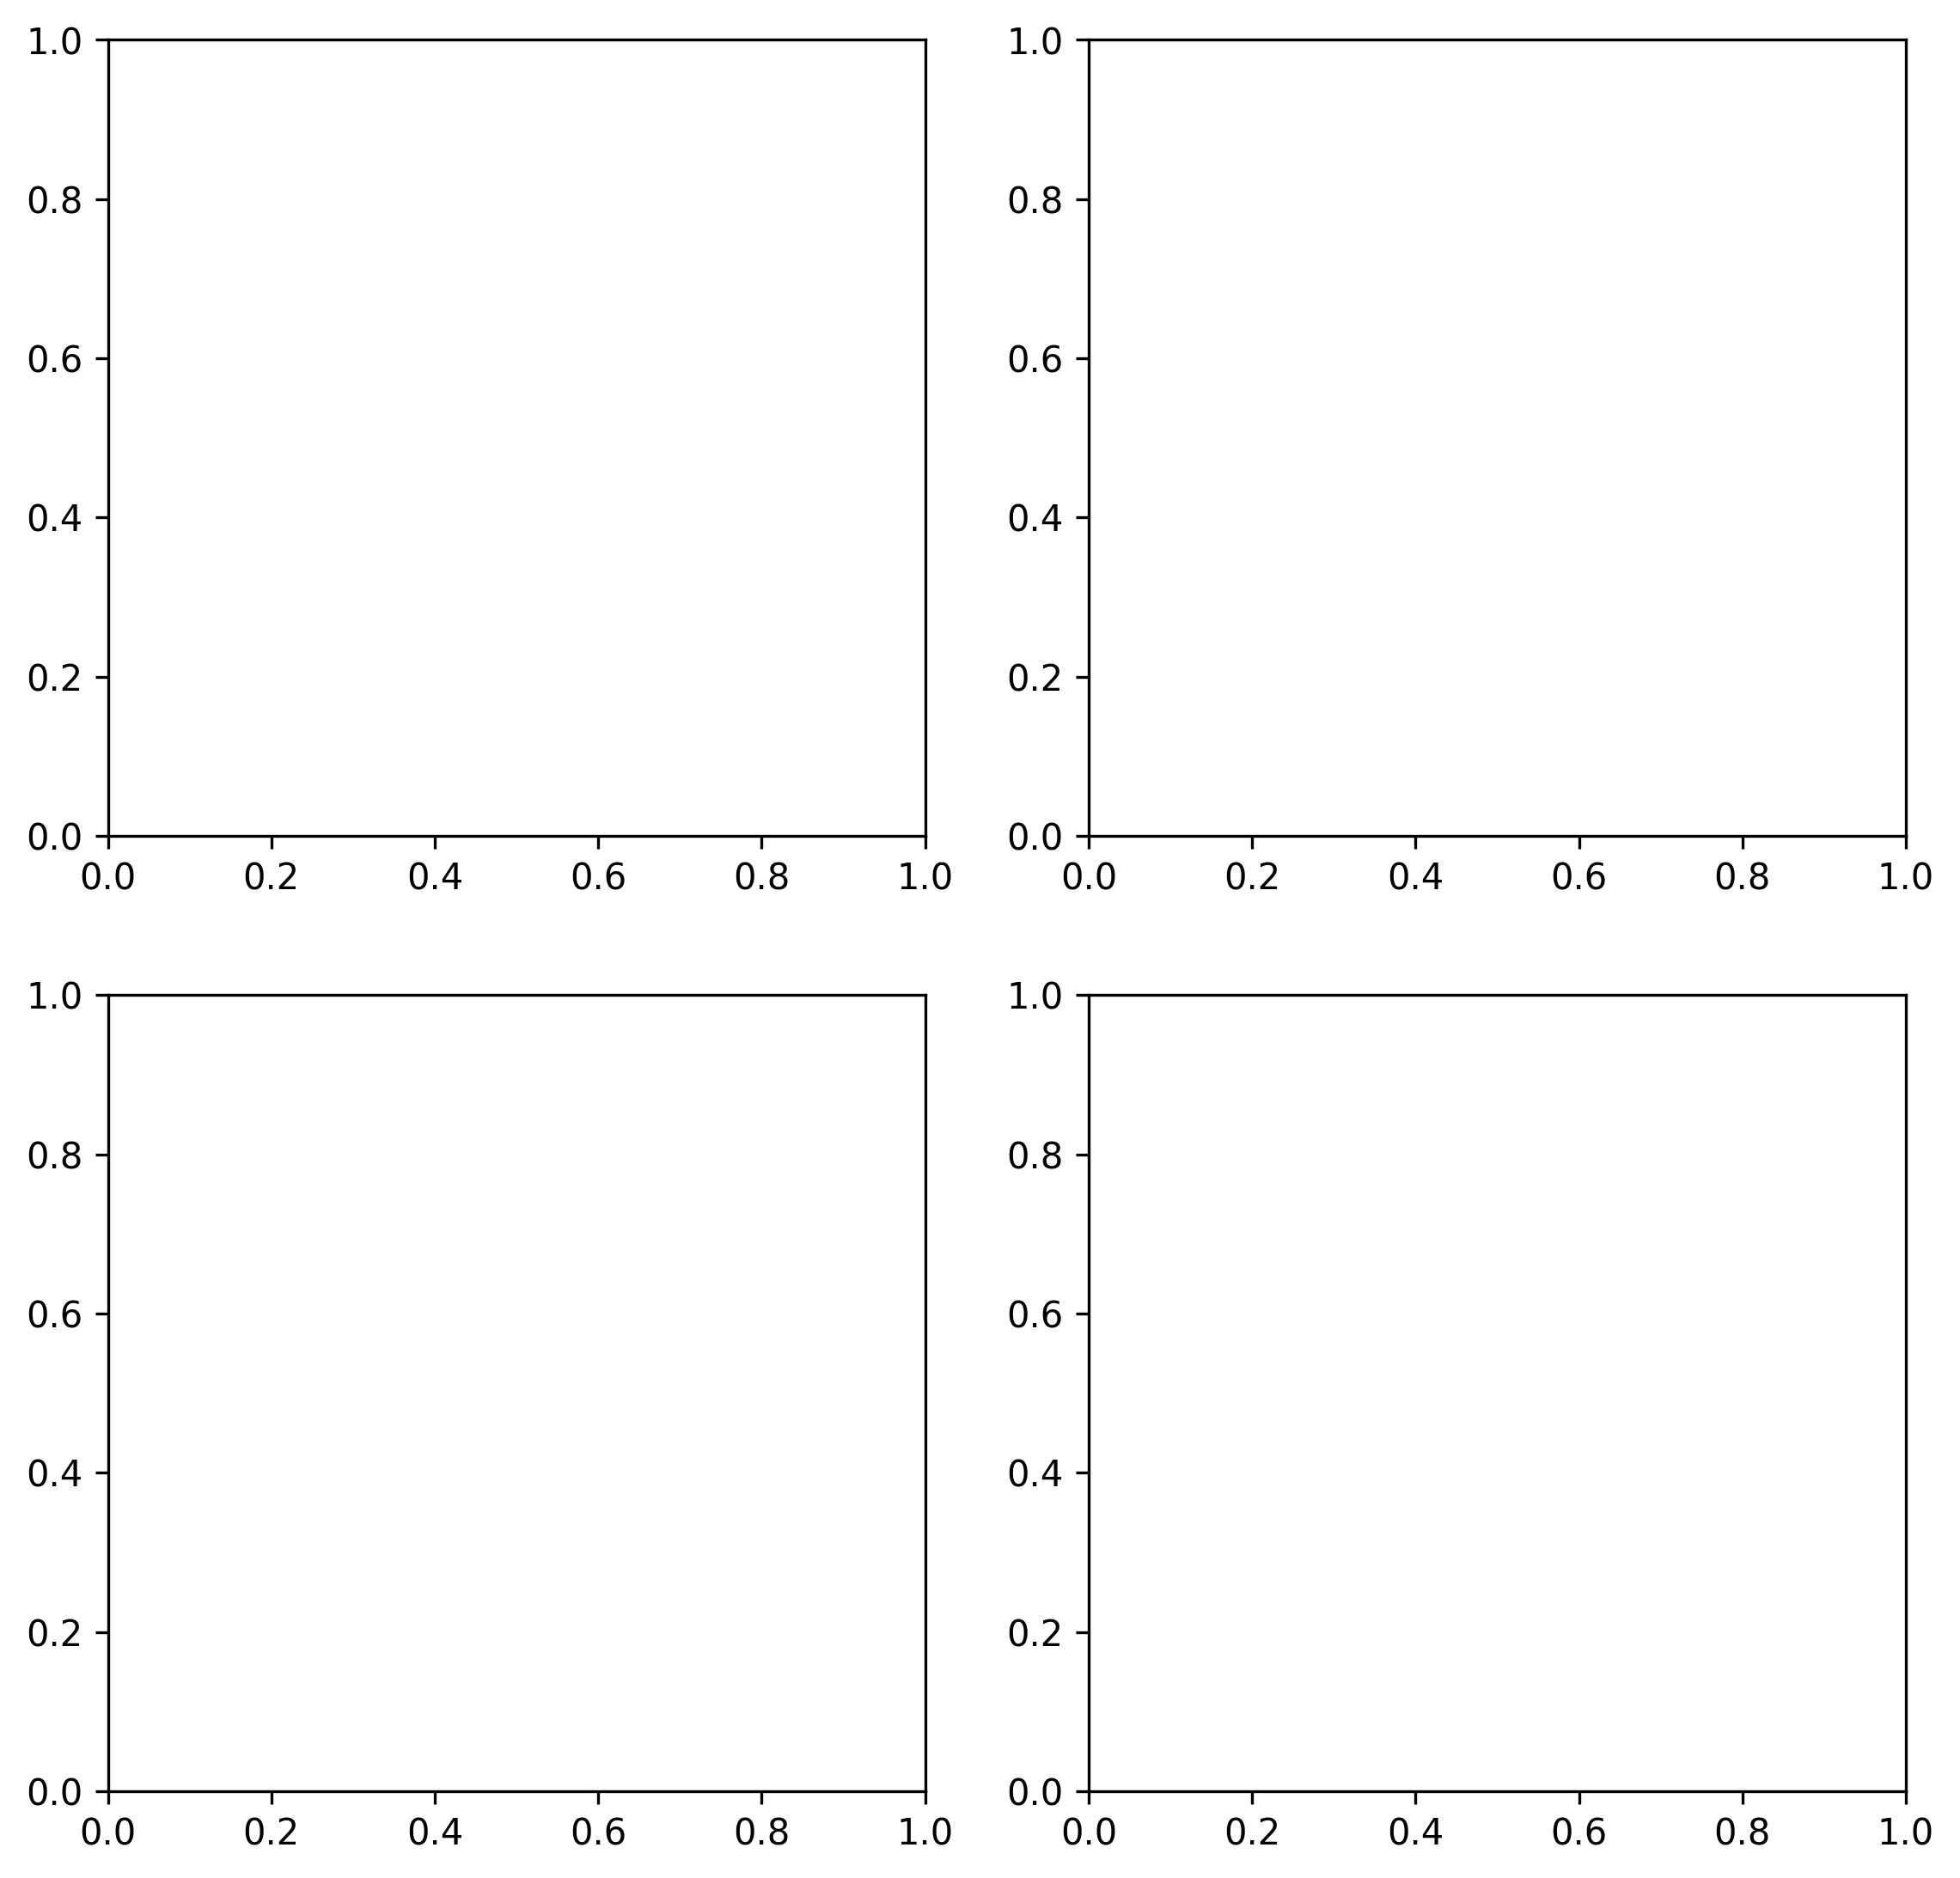

In [47]:
# график 9 на 9 дюймов
# с разрешением 300 точек на дюйм
# 2 строки и 2 столбца

fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        ncols = 2, 
                        nrows = 2)

В переменную `fig` мы сохраняем «материальное» изображение (графический объект, картинку), а в переменную – `axs` – набор осей для четырех графиков, который на самом деле является массивом.

In [48]:
axs

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Так как в данном случае графики размещаются в «таблице» 2 на 2, массив с осями для графиков двумерный (массив из двух массивов, в каждом – два набора осей). Можем удостовериться:

In [49]:
print(axs.shape)

(2, 2)


Выбор отдельных осей в таком случае будет осуществляться через двойные индексы – сначала нужно выбрать номер строки, а затем – номер столбца:

In [50]:
# первая строка, первый столбец
axs[0][0]

<AxesSubplot:>

In [51]:
# первая строка, второй столбец
axs[0][1]

<AxesSubplot:>

Если нам нужно в каждые оси поставить разные типы графиков, можно обратиться к каждому элементу отдельно, и к каждым осям применить соответствующий метод: 

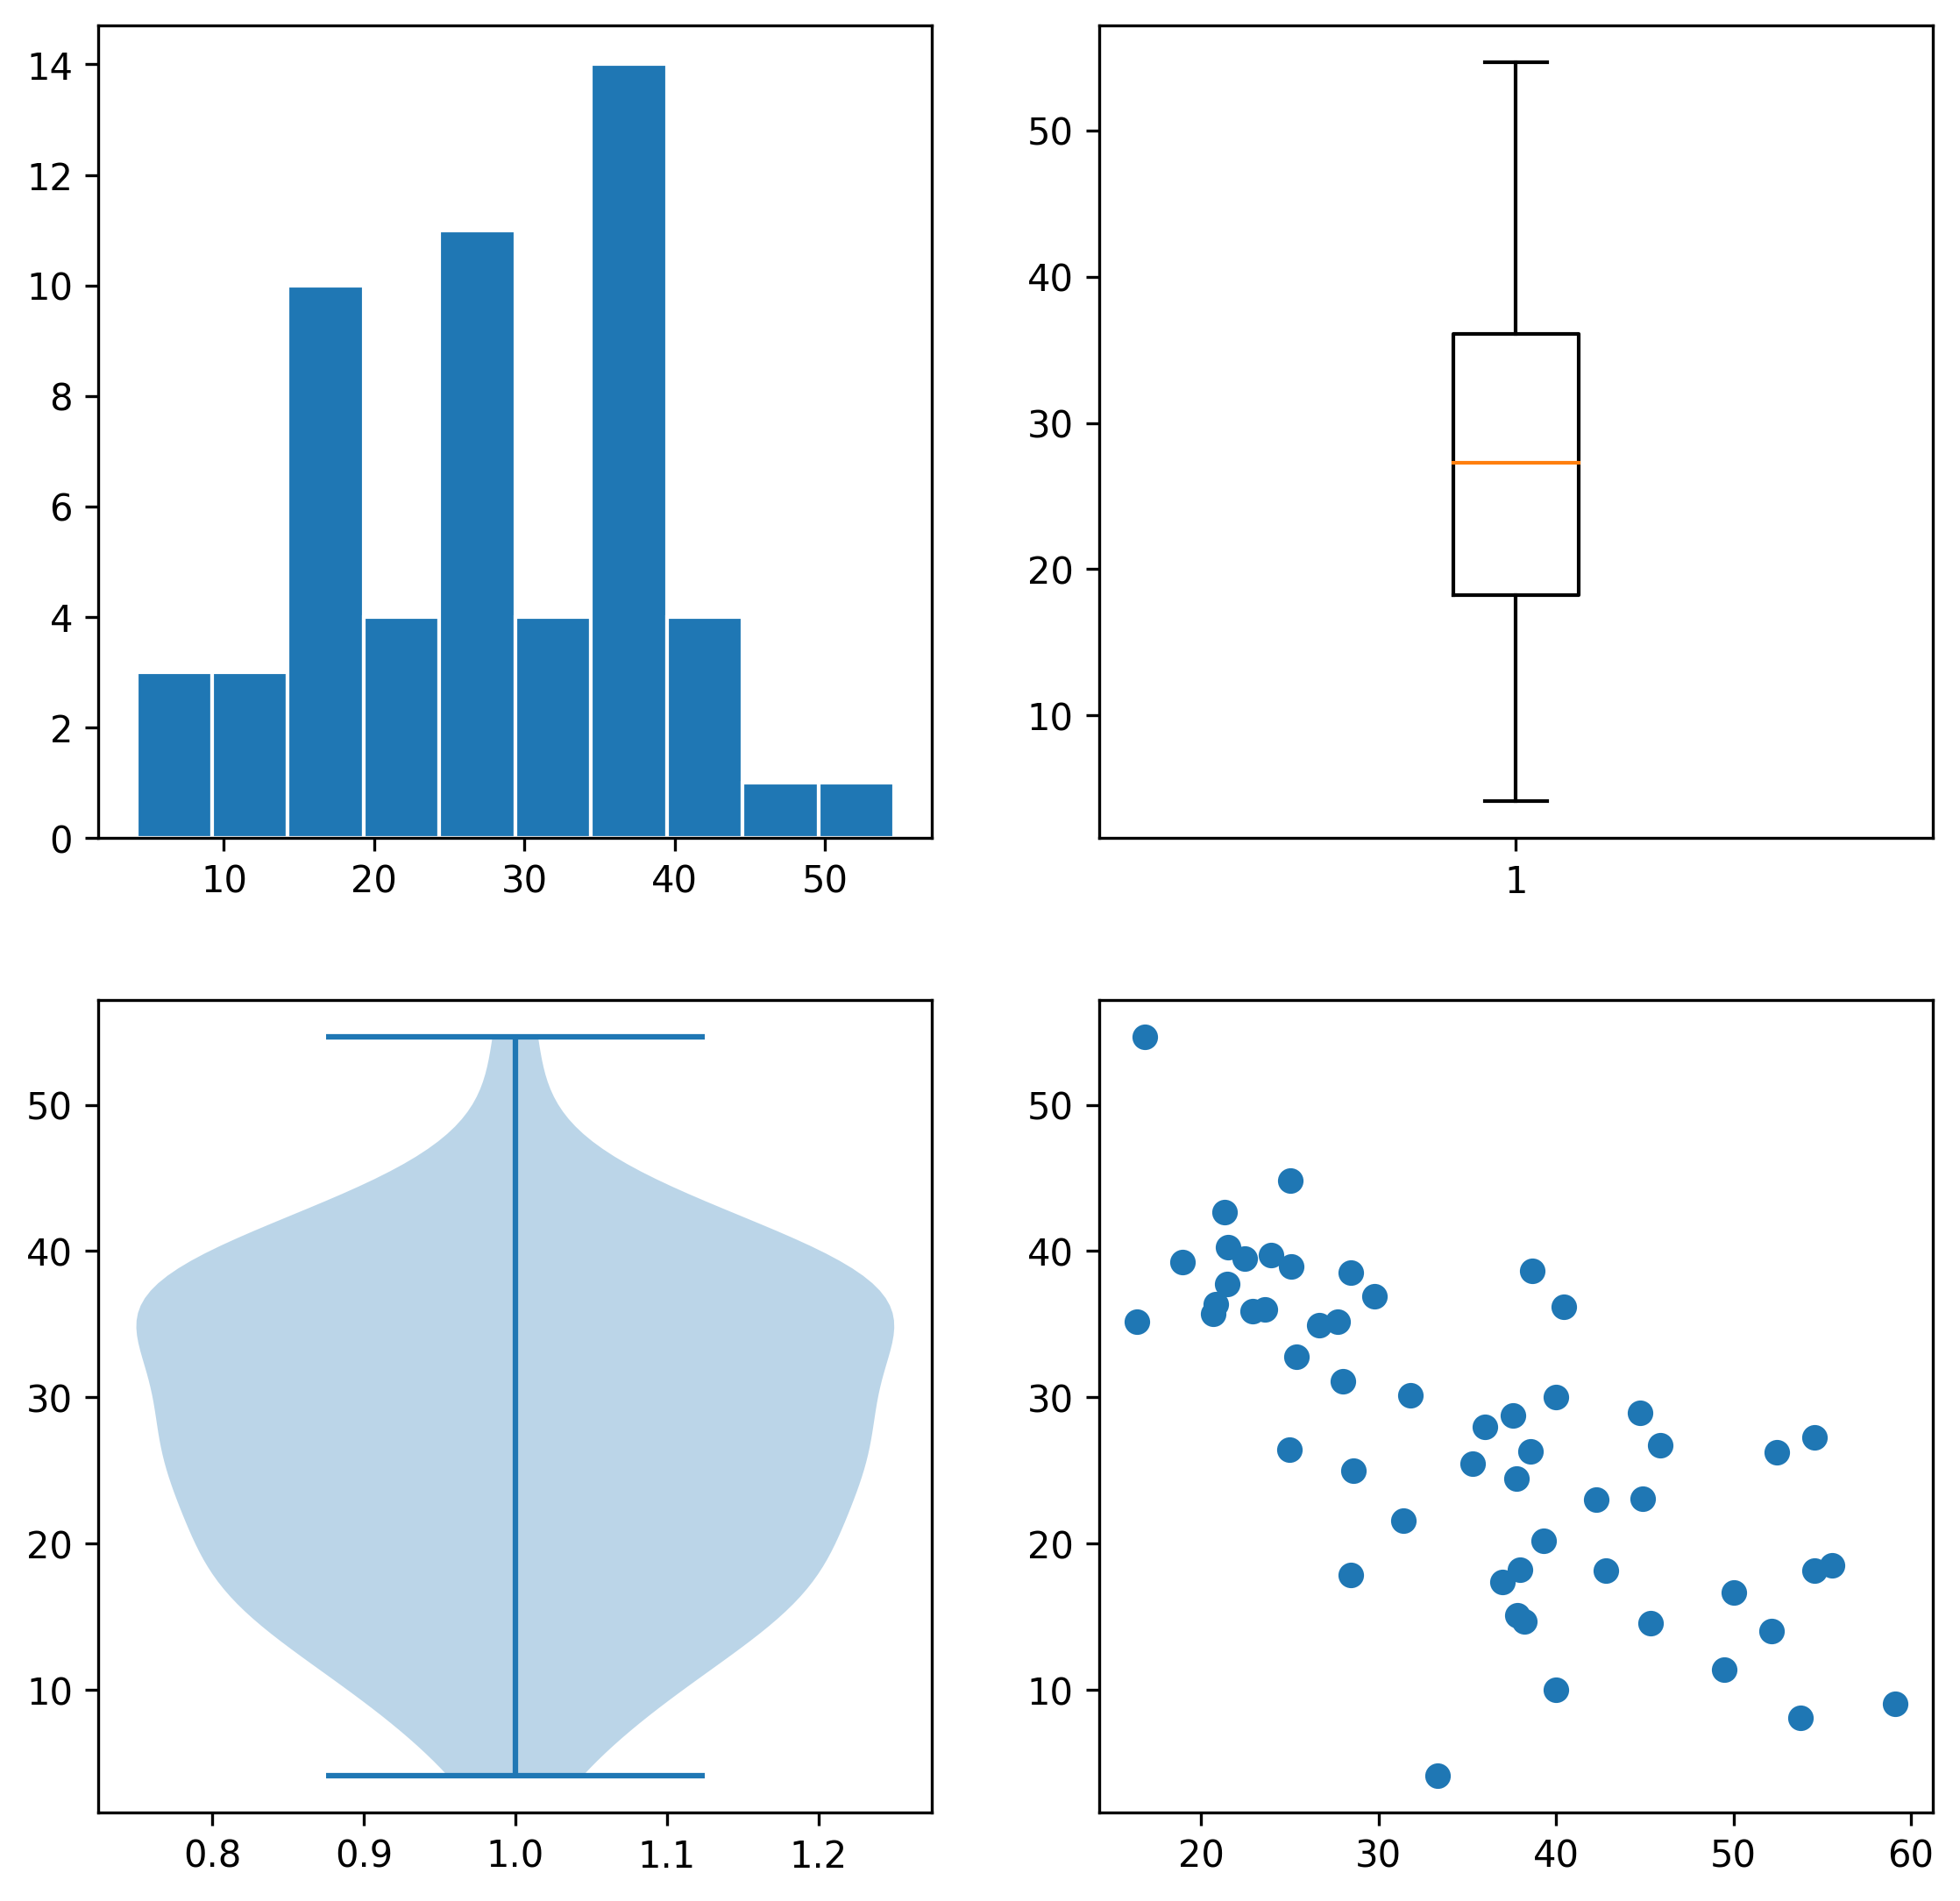

In [65]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2)

# выбираем Ненецкий автономный округ (data – датафрейм)
data = grouped.get_group("Ненецкий автономный округ")

# гистограмма, ящик с усами скрипичная диаграмма,
# диаграмма рассеивания ЕР vs КПРФ

axs[0][0].hist(data["КПРФ%"], edgecolor = "white");
axs[0][1].boxplot(data["КПРФ%"]);
axs[1][0].violinplot(data["КПРФ%"]);
axs[1][1].scatter(data["ЕР%"], data["КПРФ%"]);

А вот если нам нужно воспроизвести и доработать график, который мы получили для процента голосов за КПРФ ранее (гистограммы для каждого региона), логичнее запустить цикл, где на каждой итерации будет выбираться нужная группа, и, например, заголовок и цвет заливки.

Чтобы этого добиться наиболее простым способом и не погрязнуть во вложенных конструкциях и индексах, имеет смысл для перебора в таком цикле использовать «тройки» значений. На первом месте в каждой «тройке» будет название региона, на втором – оси для графика, на третьем – цвет заливки для гистограммы. Набор названий регионов у нас уже есть:

In [66]:
grouped.groups.keys()

dict_keys(['Ненецкий автономный округ', 'Республика Марий Эл', 'Республика Саха (Якутия)', 'Хабаровский край'])

Набор осей тоже есть, но он имеет размерность 2 на 2:

    array([[<AxesSubplot:>, <AxesSubplot:>],
           [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

 Чтобы такой массив «распрямить» и сделать его визуально неотличимым от обычного одномерного списка, на массивах определен метод `.flatten()`:

In [67]:
# не 2 по 2, а просто 4 элемента
axs.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

Создадим список из четырех цветов заливки:

In [69]:
# оттенки бордового из палитр https://colorhunt.co/

fill = ["#740938", "#AF1740", "#CC2B52", "#DE7C7D"]

Теперь можем объединить эти списки в «тройки» значений с помощью функции `zip()`:

In [70]:
zip(grouped.groups.keys(), axs.flatten(), fill)

Чтобы вспомнить, что делает эта функция, «распакуем» содержимое через `print()` и `*`:

In [71]:
print(*zip(grouped.groups.keys(), axs.flatten(), fill))

('Ненецкий автономный округ', <AxesSubplot:>, '#740938') ('Республика Марий Эл', <AxesSubplot:>, '#AF1740') ('Республика Саха (Якутия)', <AxesSubplot:>, '#CC2B52') ('Хабаровский край', <AxesSubplot:>, '#DE7C7D')


Функция `zip()` создала набор из нужных нам «троек» элементов, теперь мы сможем запустить по нему цикл, считая, что первый элемент – это всегда название региона, второй – оси для гистограммы, третий – цвет заливки гистограммы.

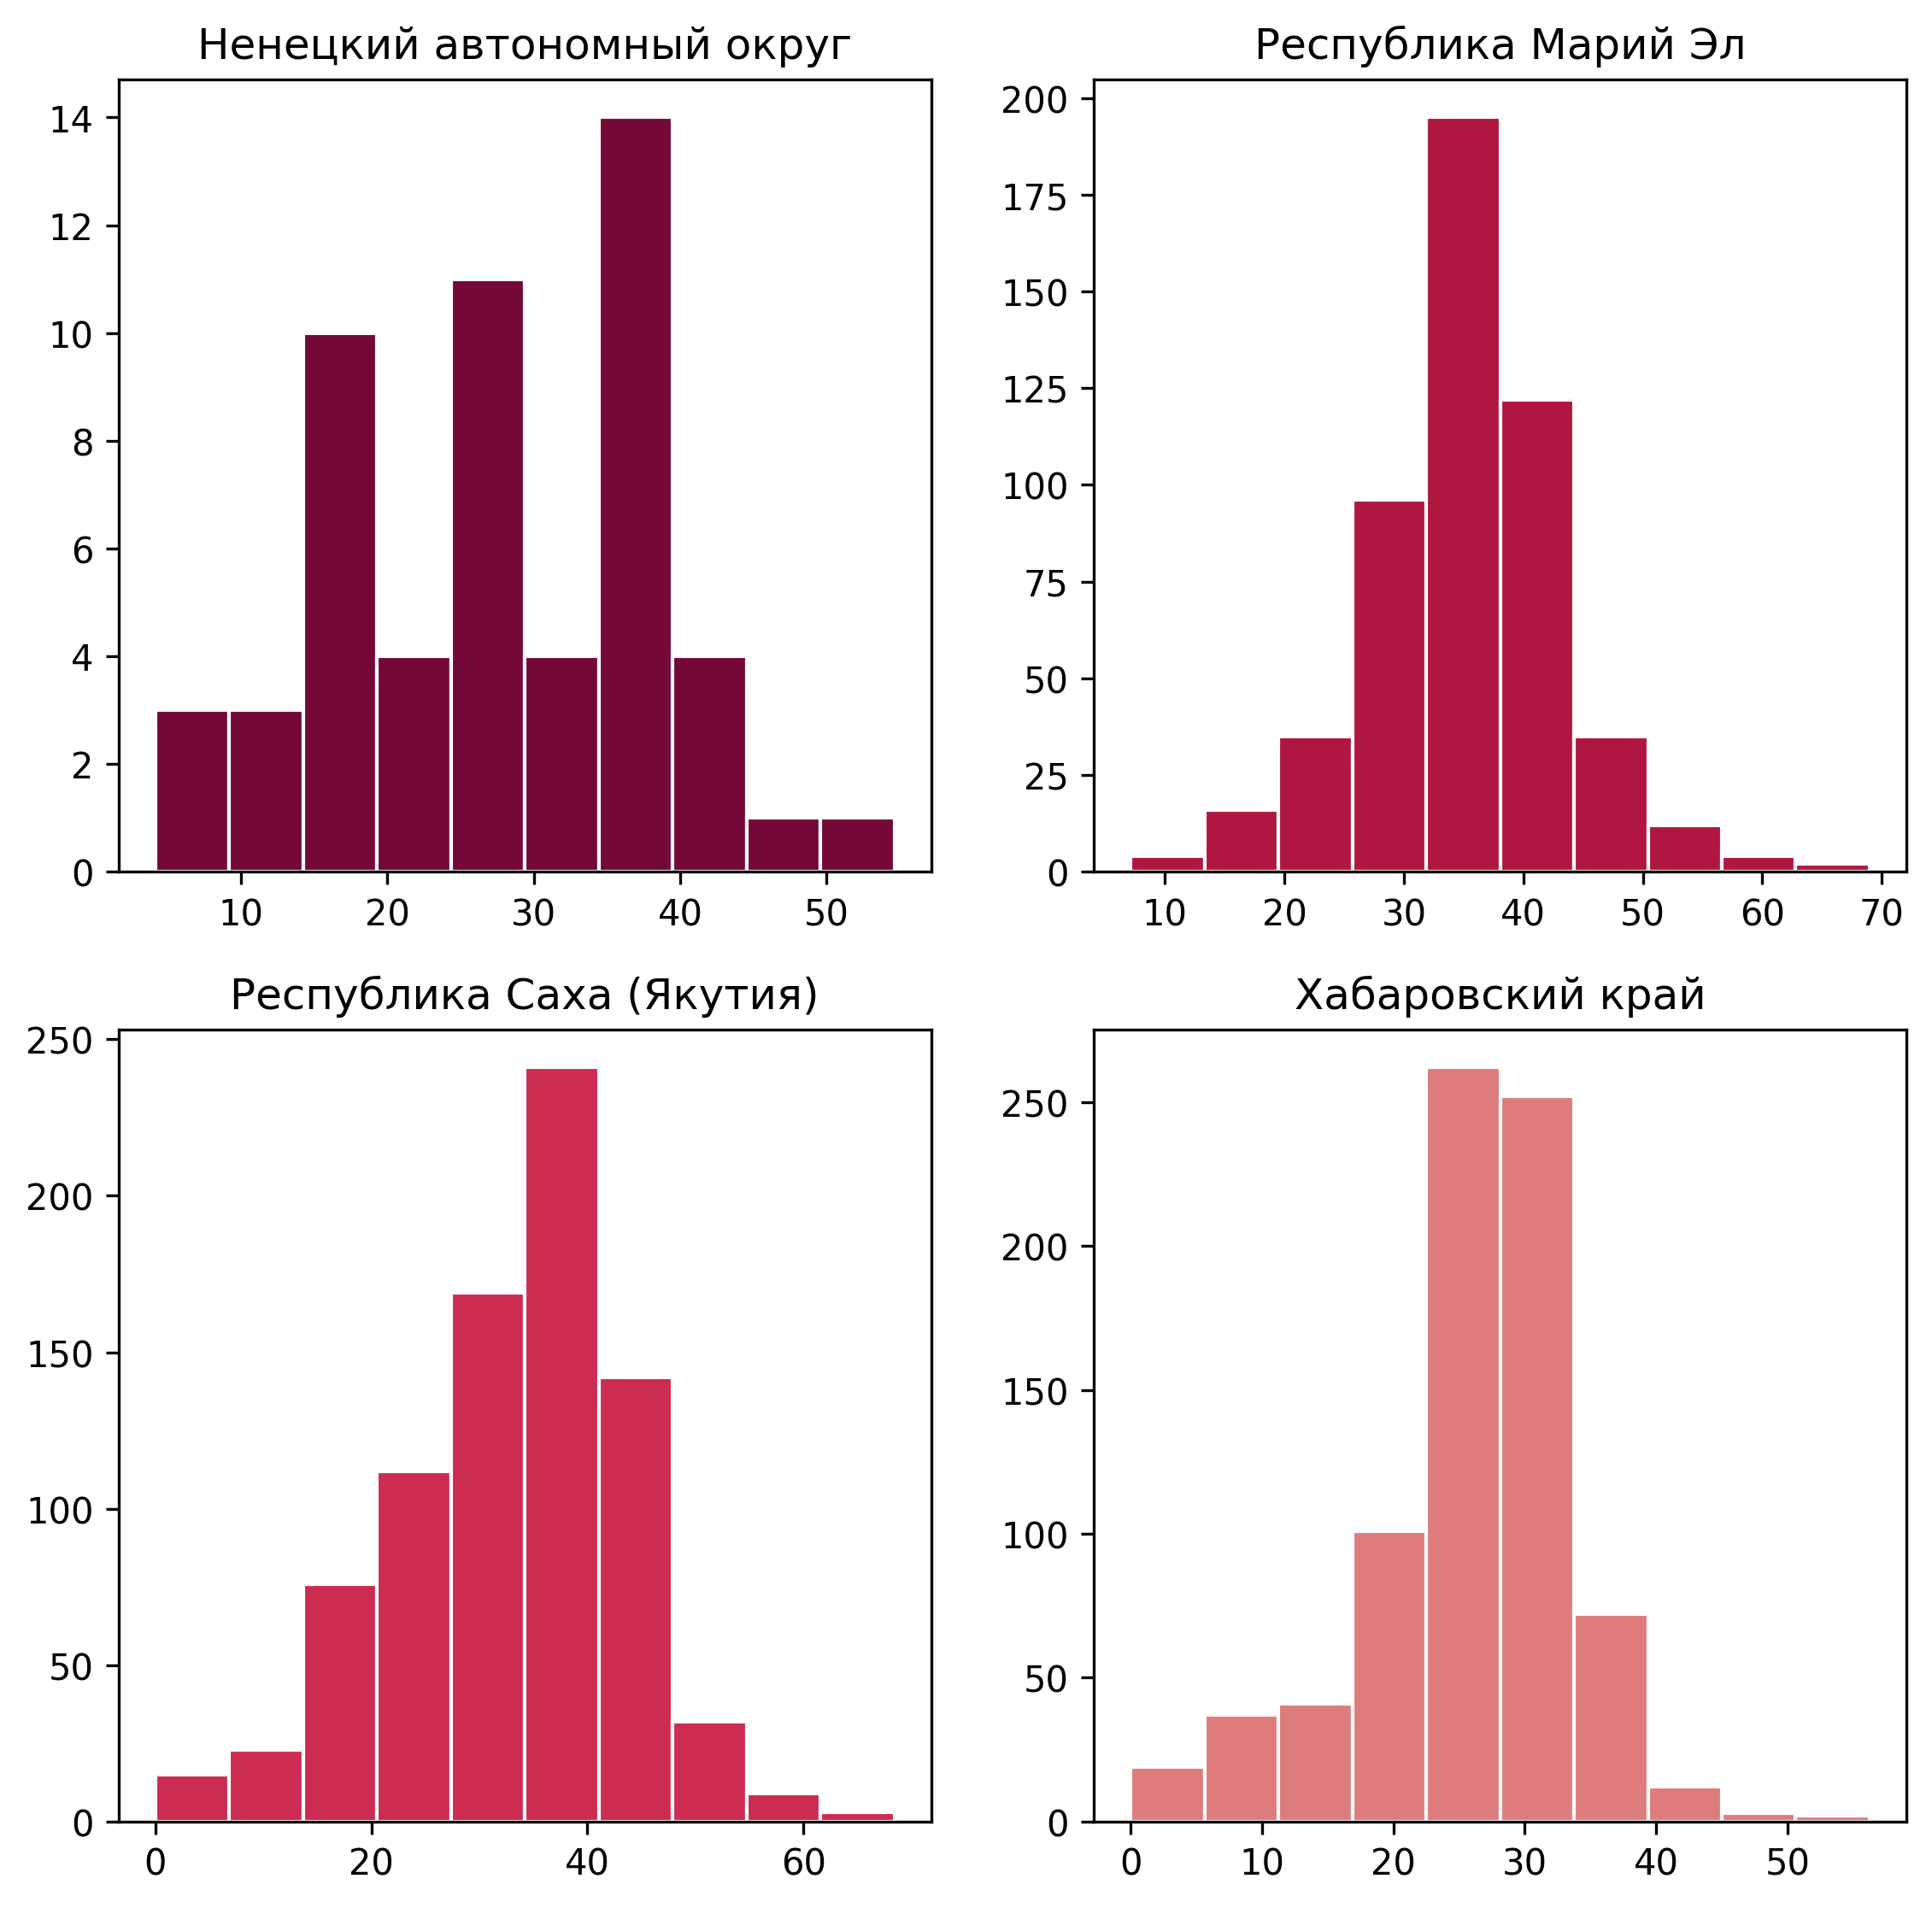

In [72]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2)

# на каждом шаге подставляем в get_group() название региона name,
# отбираем для него строки, выбираем столбец КПРФ%,
# строим график в осях ax, подставляем цвет col и заголовок name

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    ax.hist(grouped.get_group(name)["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(name)

Добавим подписи к осям X и Y, они не зависят от переменных, указанных в цикле, они везде одинаковы:

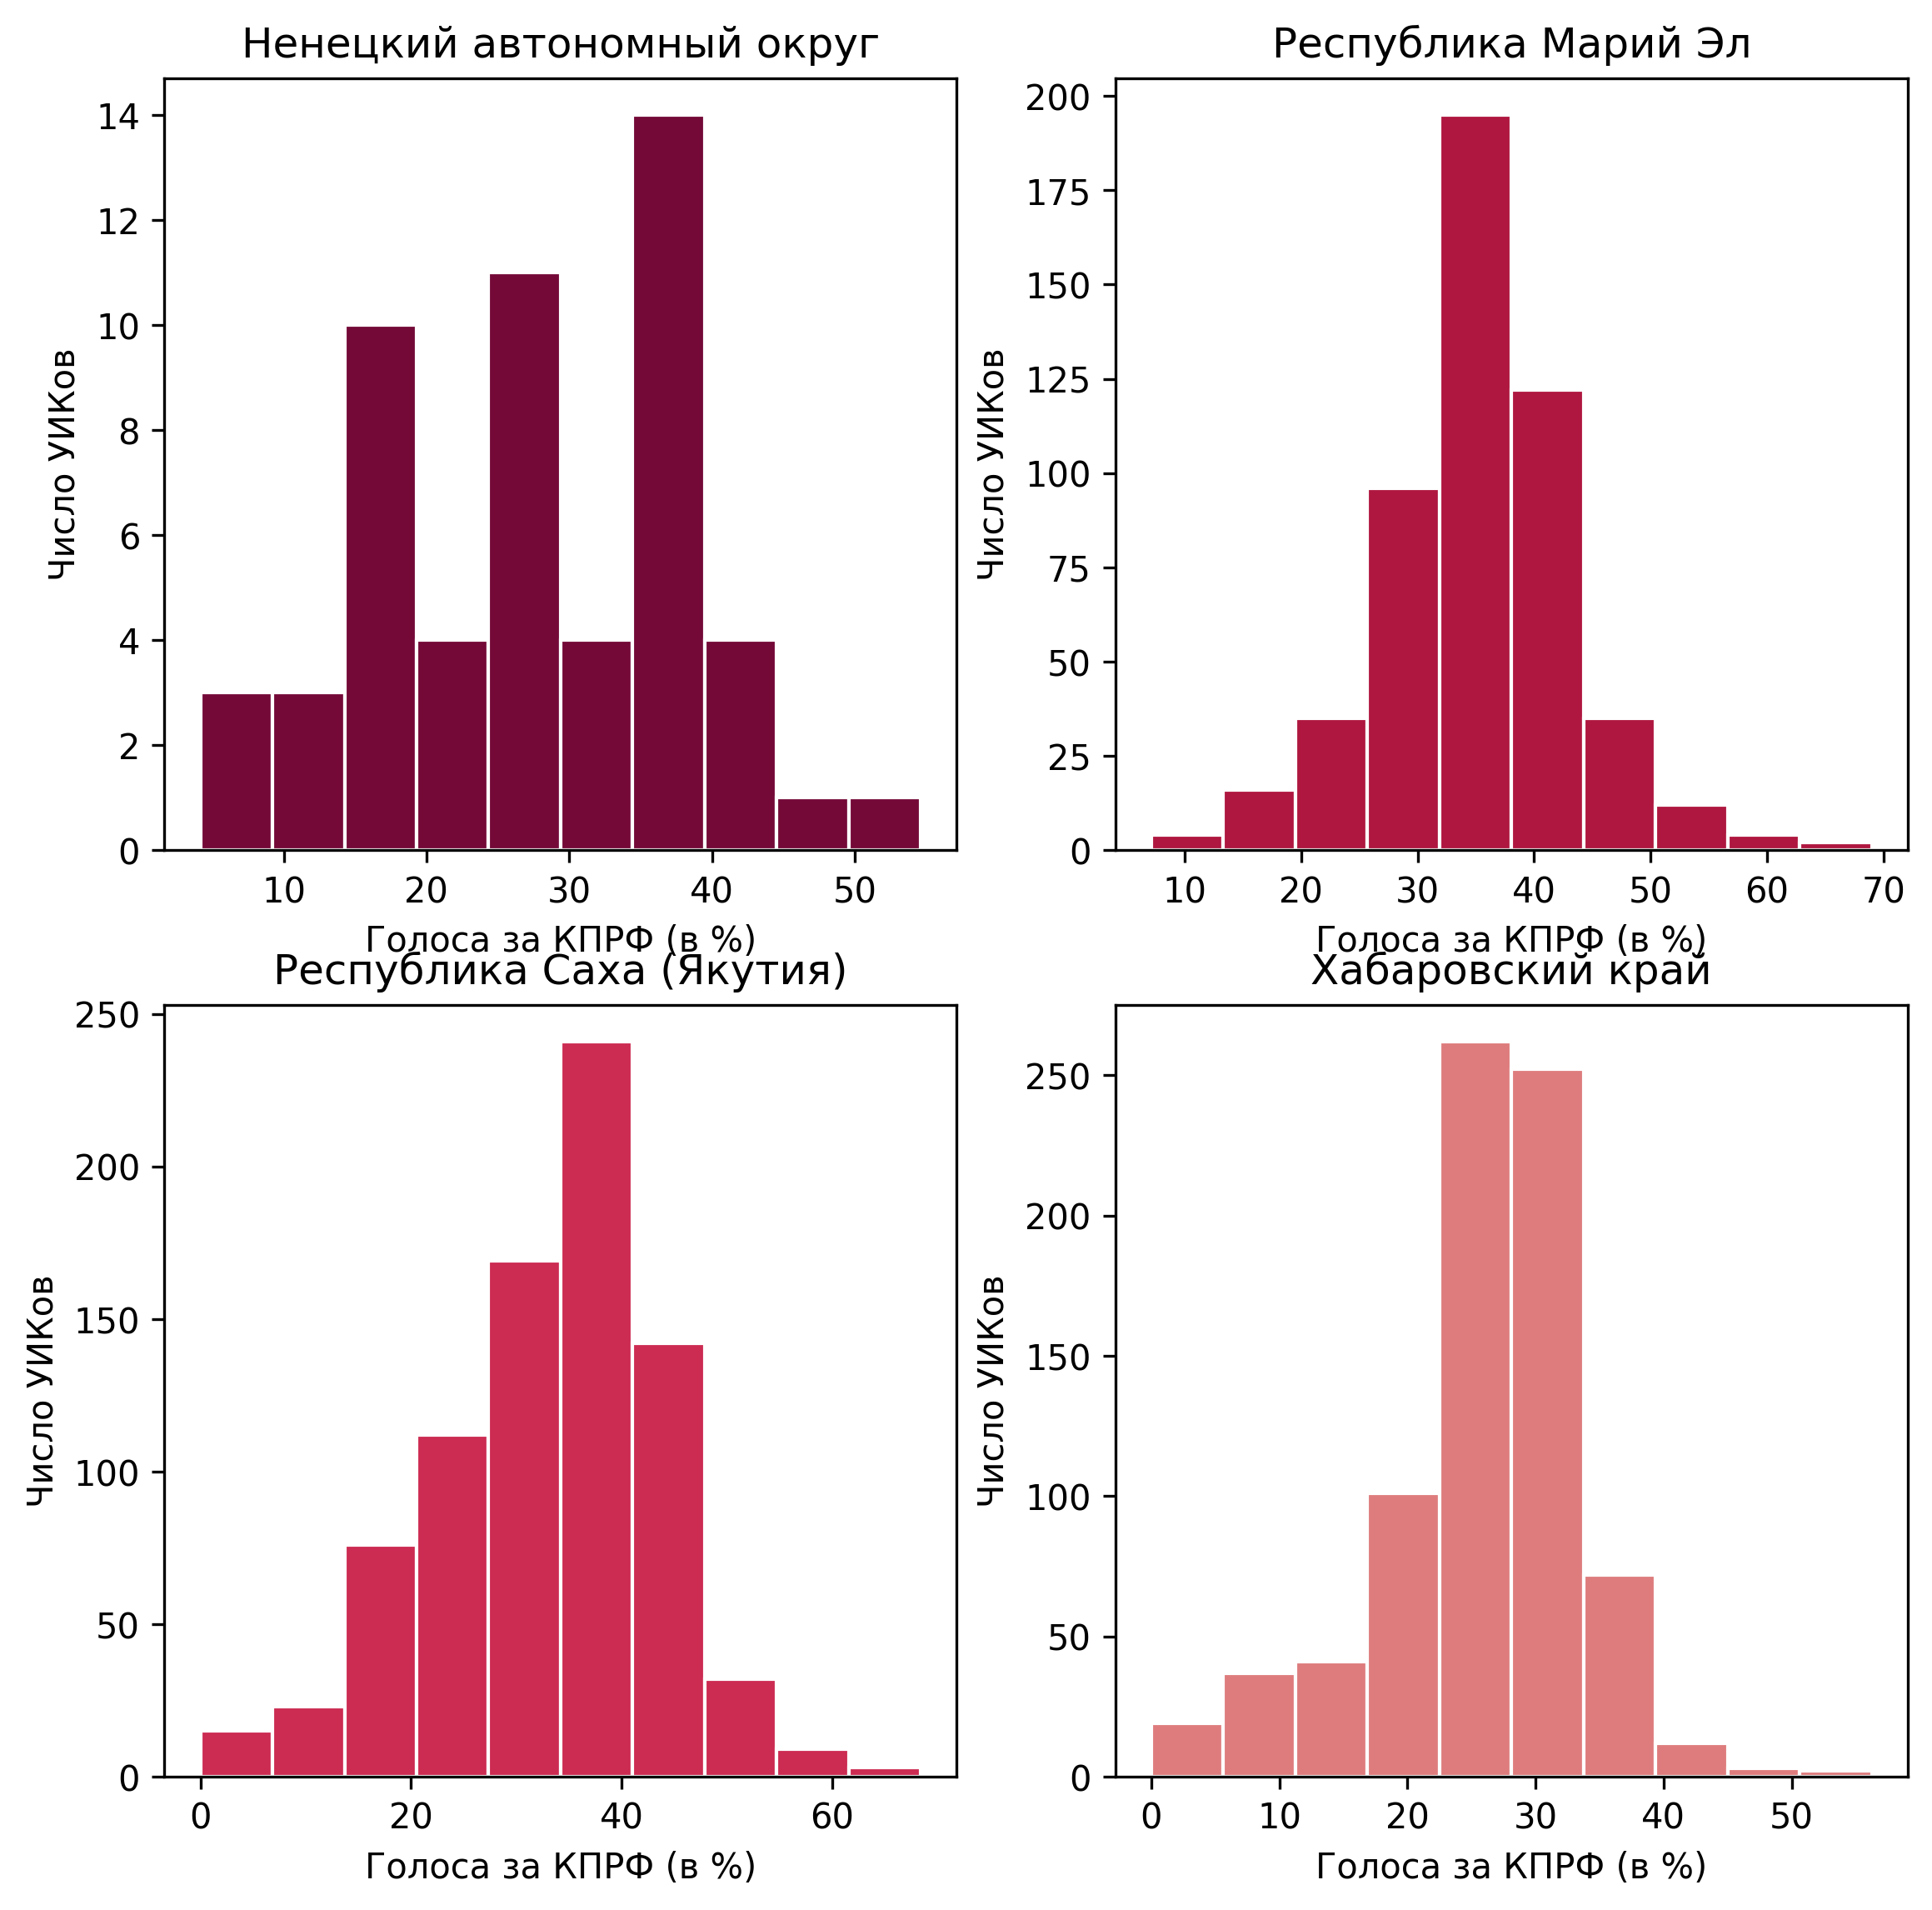

In [73]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2)

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    ax.hist(grouped.get_group(name)["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(name)
    ax.set_xlabel("Голоса за КПРФ (в %)")
    ax.set_ylabel("Число УИКов")

Проблема: если добавляем подписи, названия осей и заголовки соседних графиков почти слипаются. Увеличим расстояние между графиками по горизонтали (между строками в сетке графиков) и по вертикали (между столбцами в сетке графиков). Так как сетка с подграфиками называется *grid*, эти настройки регулируются в рамках аргумента `gridspec_kw()`, от *grid specification keywords*) в `subplots()`.

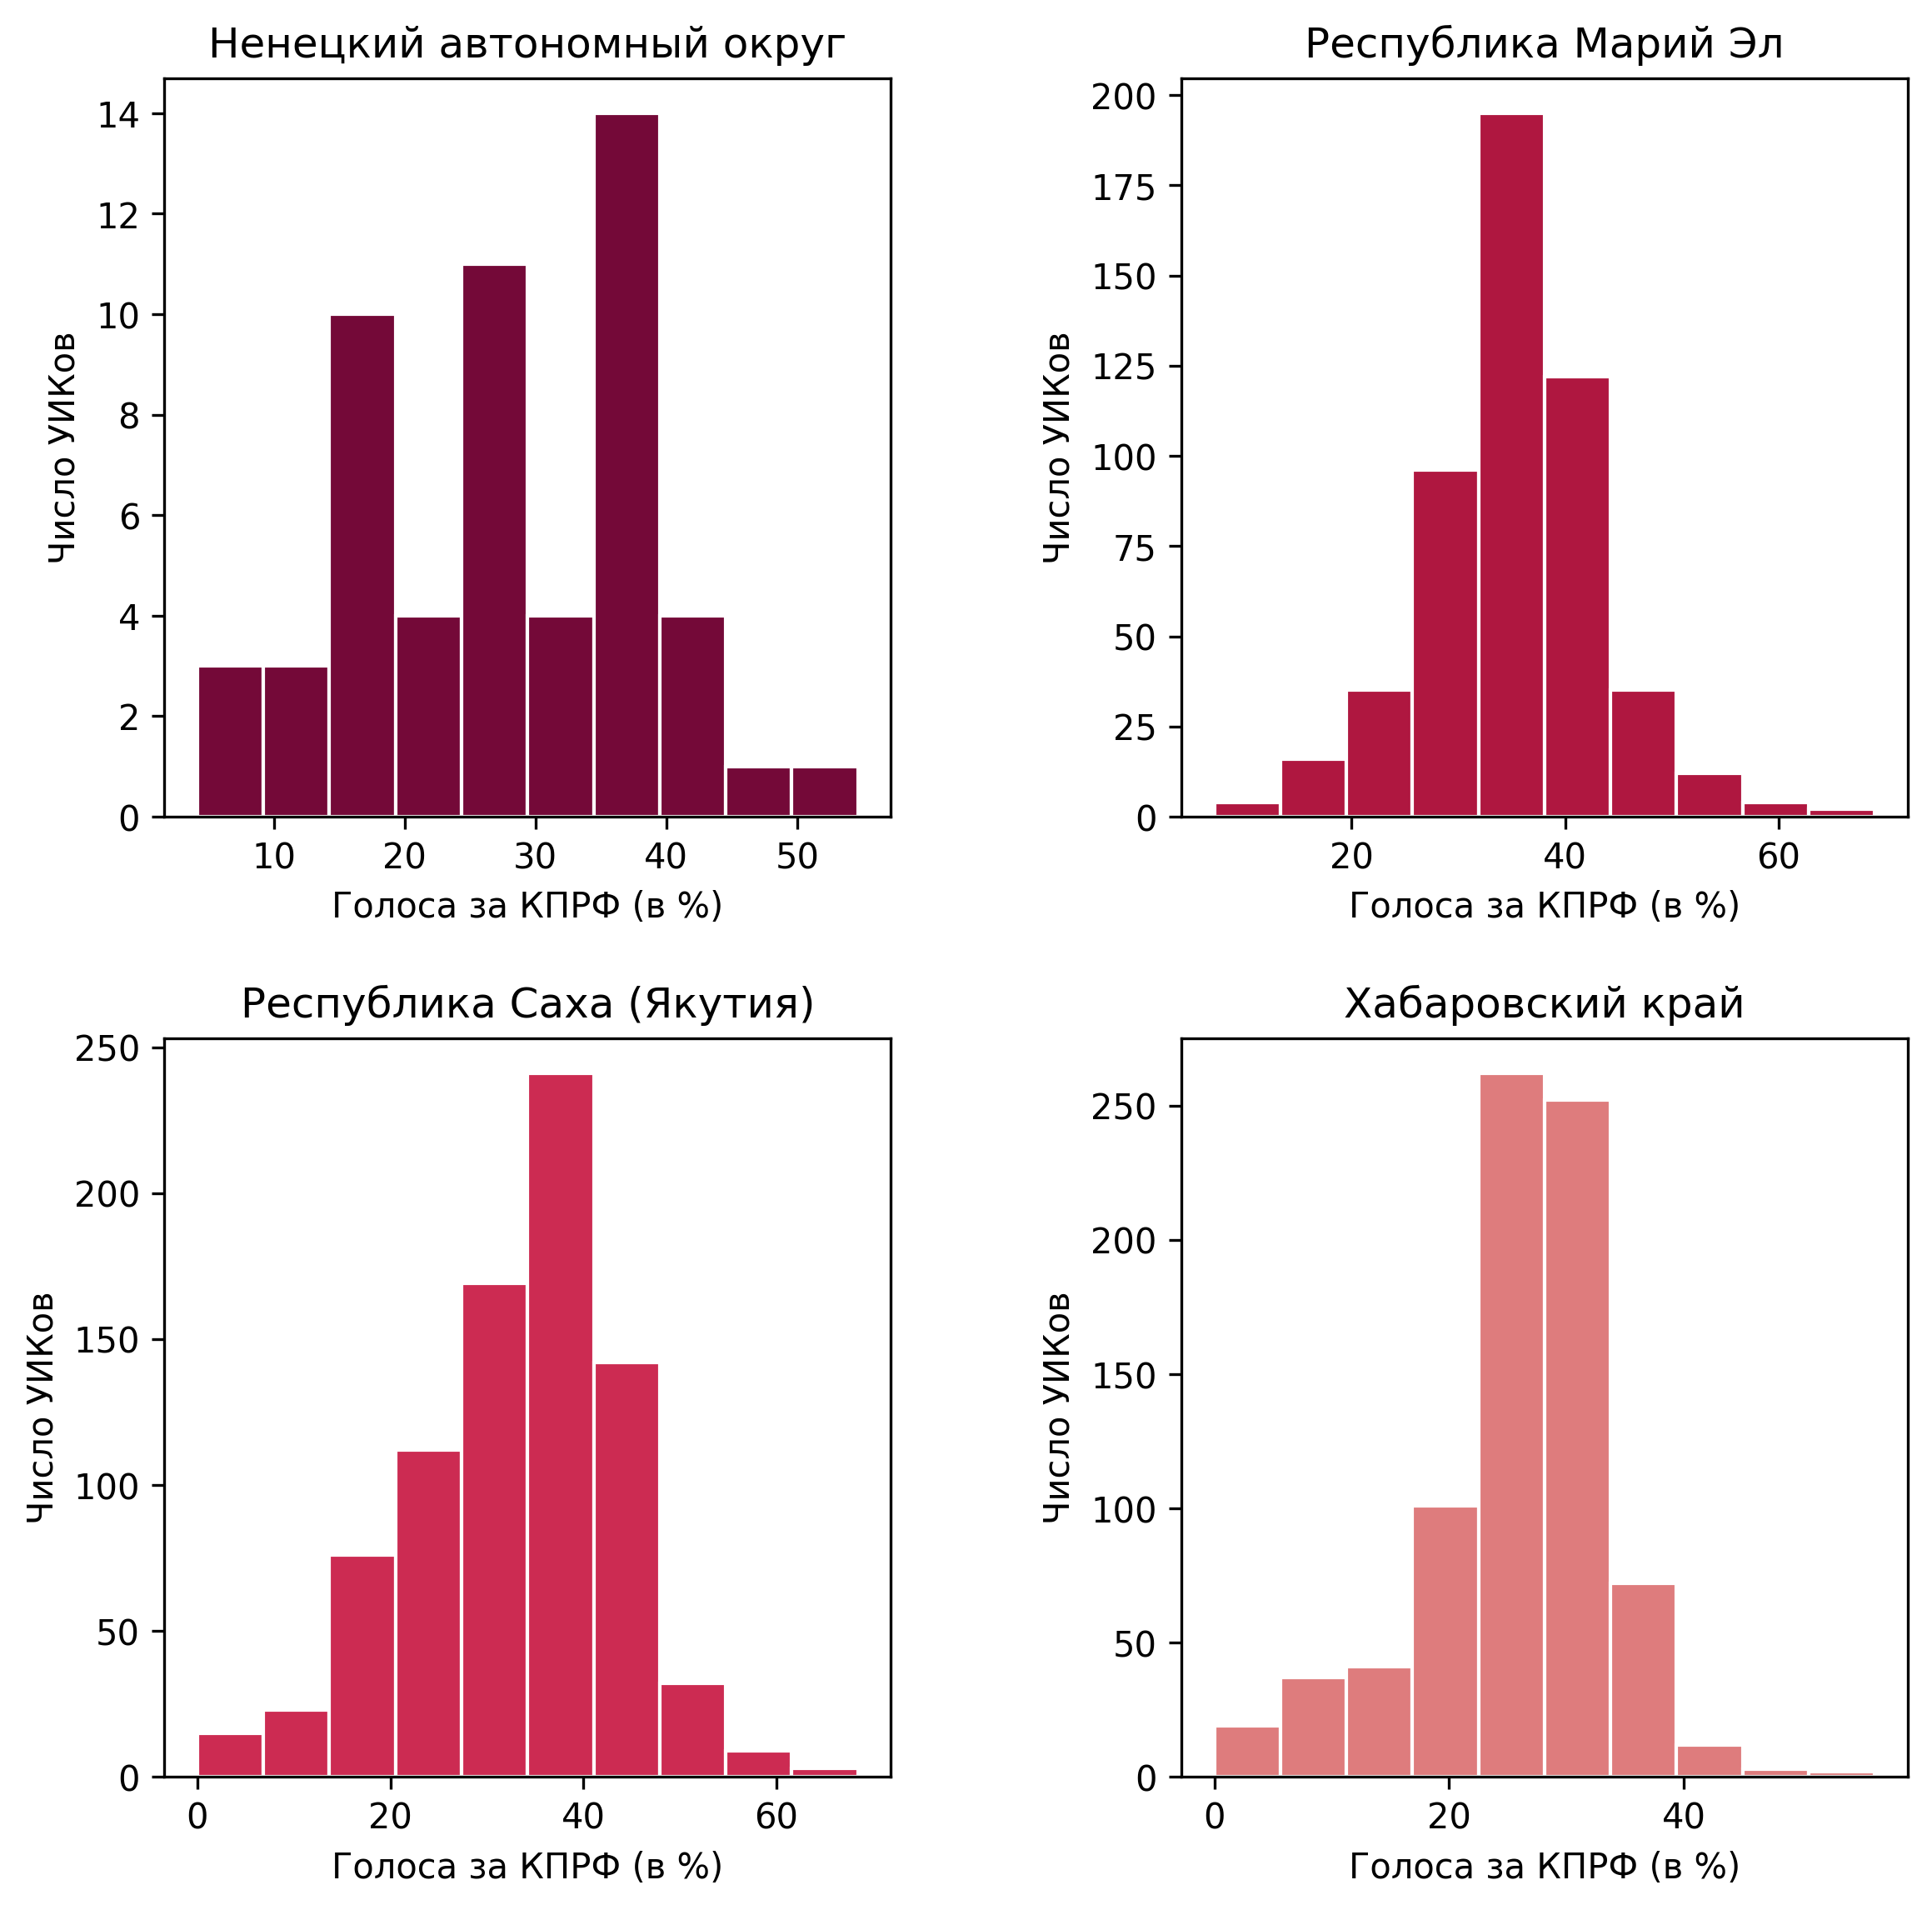

In [74]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2,
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4))

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    ax.hist(grouped.get_group(name)["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(name)
    ax.set_xlabel("Голоса за КПРФ (в %)")
    ax.set_ylabel("Число УИКов")

Главное преимущество такого подхода к графикам по группам заключается в том, что теперь мы можем любую характеристику датафрейма, соответствующего каждой группе, использовать для оформления графиков. Так, например, мы можем для удобства сохранять результат `.get_group()` в датафрейм `data`, а затем подставлять число наблюдений в этой датафрейме в заголовок:

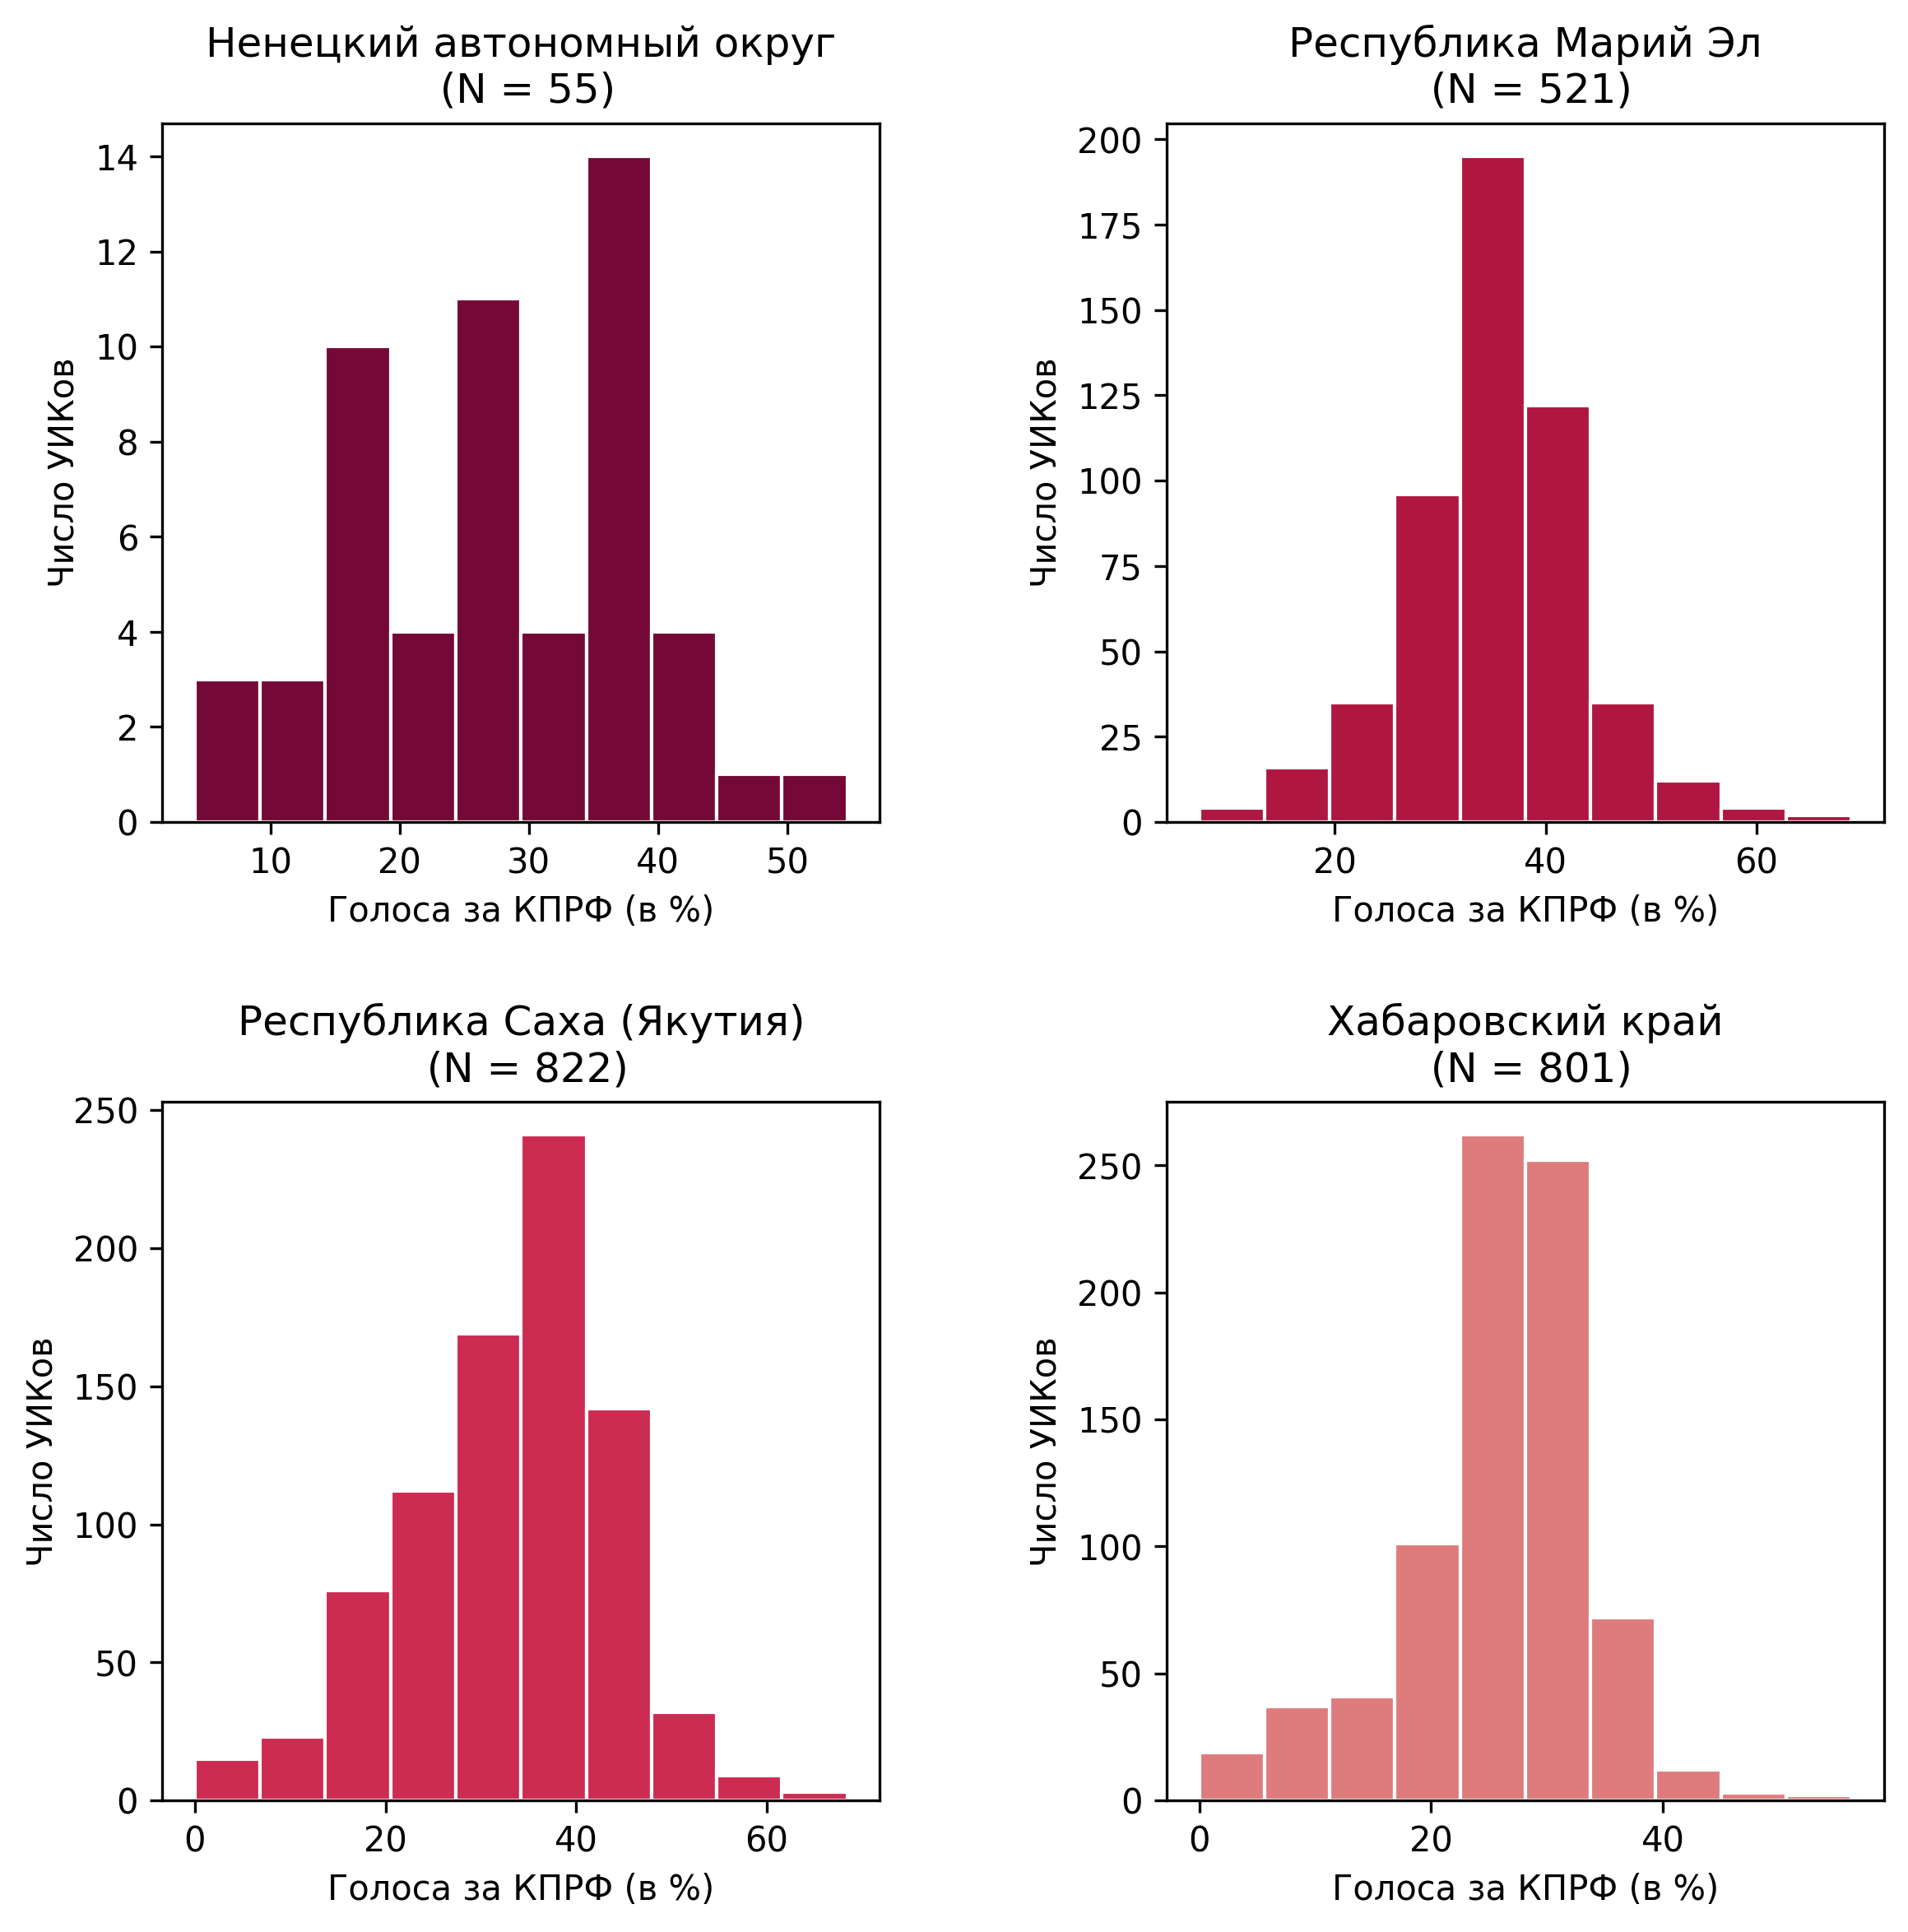

In [76]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2,
                        gridspec_kw = dict(hspace = 0.4, 
                                           wspace = 0.4))

# просто считаем n и подставляем в f-строку для заголовка

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    data = grouped.get_group(name)
    n = len(data)
    ax.hist(data["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(f"{name}\n (N = {n})")
    ax.set_xlabel("Голоса за КПРФ (в %)")
    ax.set_ylabel("Число УИКов")

Сделаем гистограммы сравнимыми – зафиксируем у всех одинаковые границы по оси X от 0 до 70 (максимальный процент за КПРФ почти 69) с помощью метода `set_xlim()`:

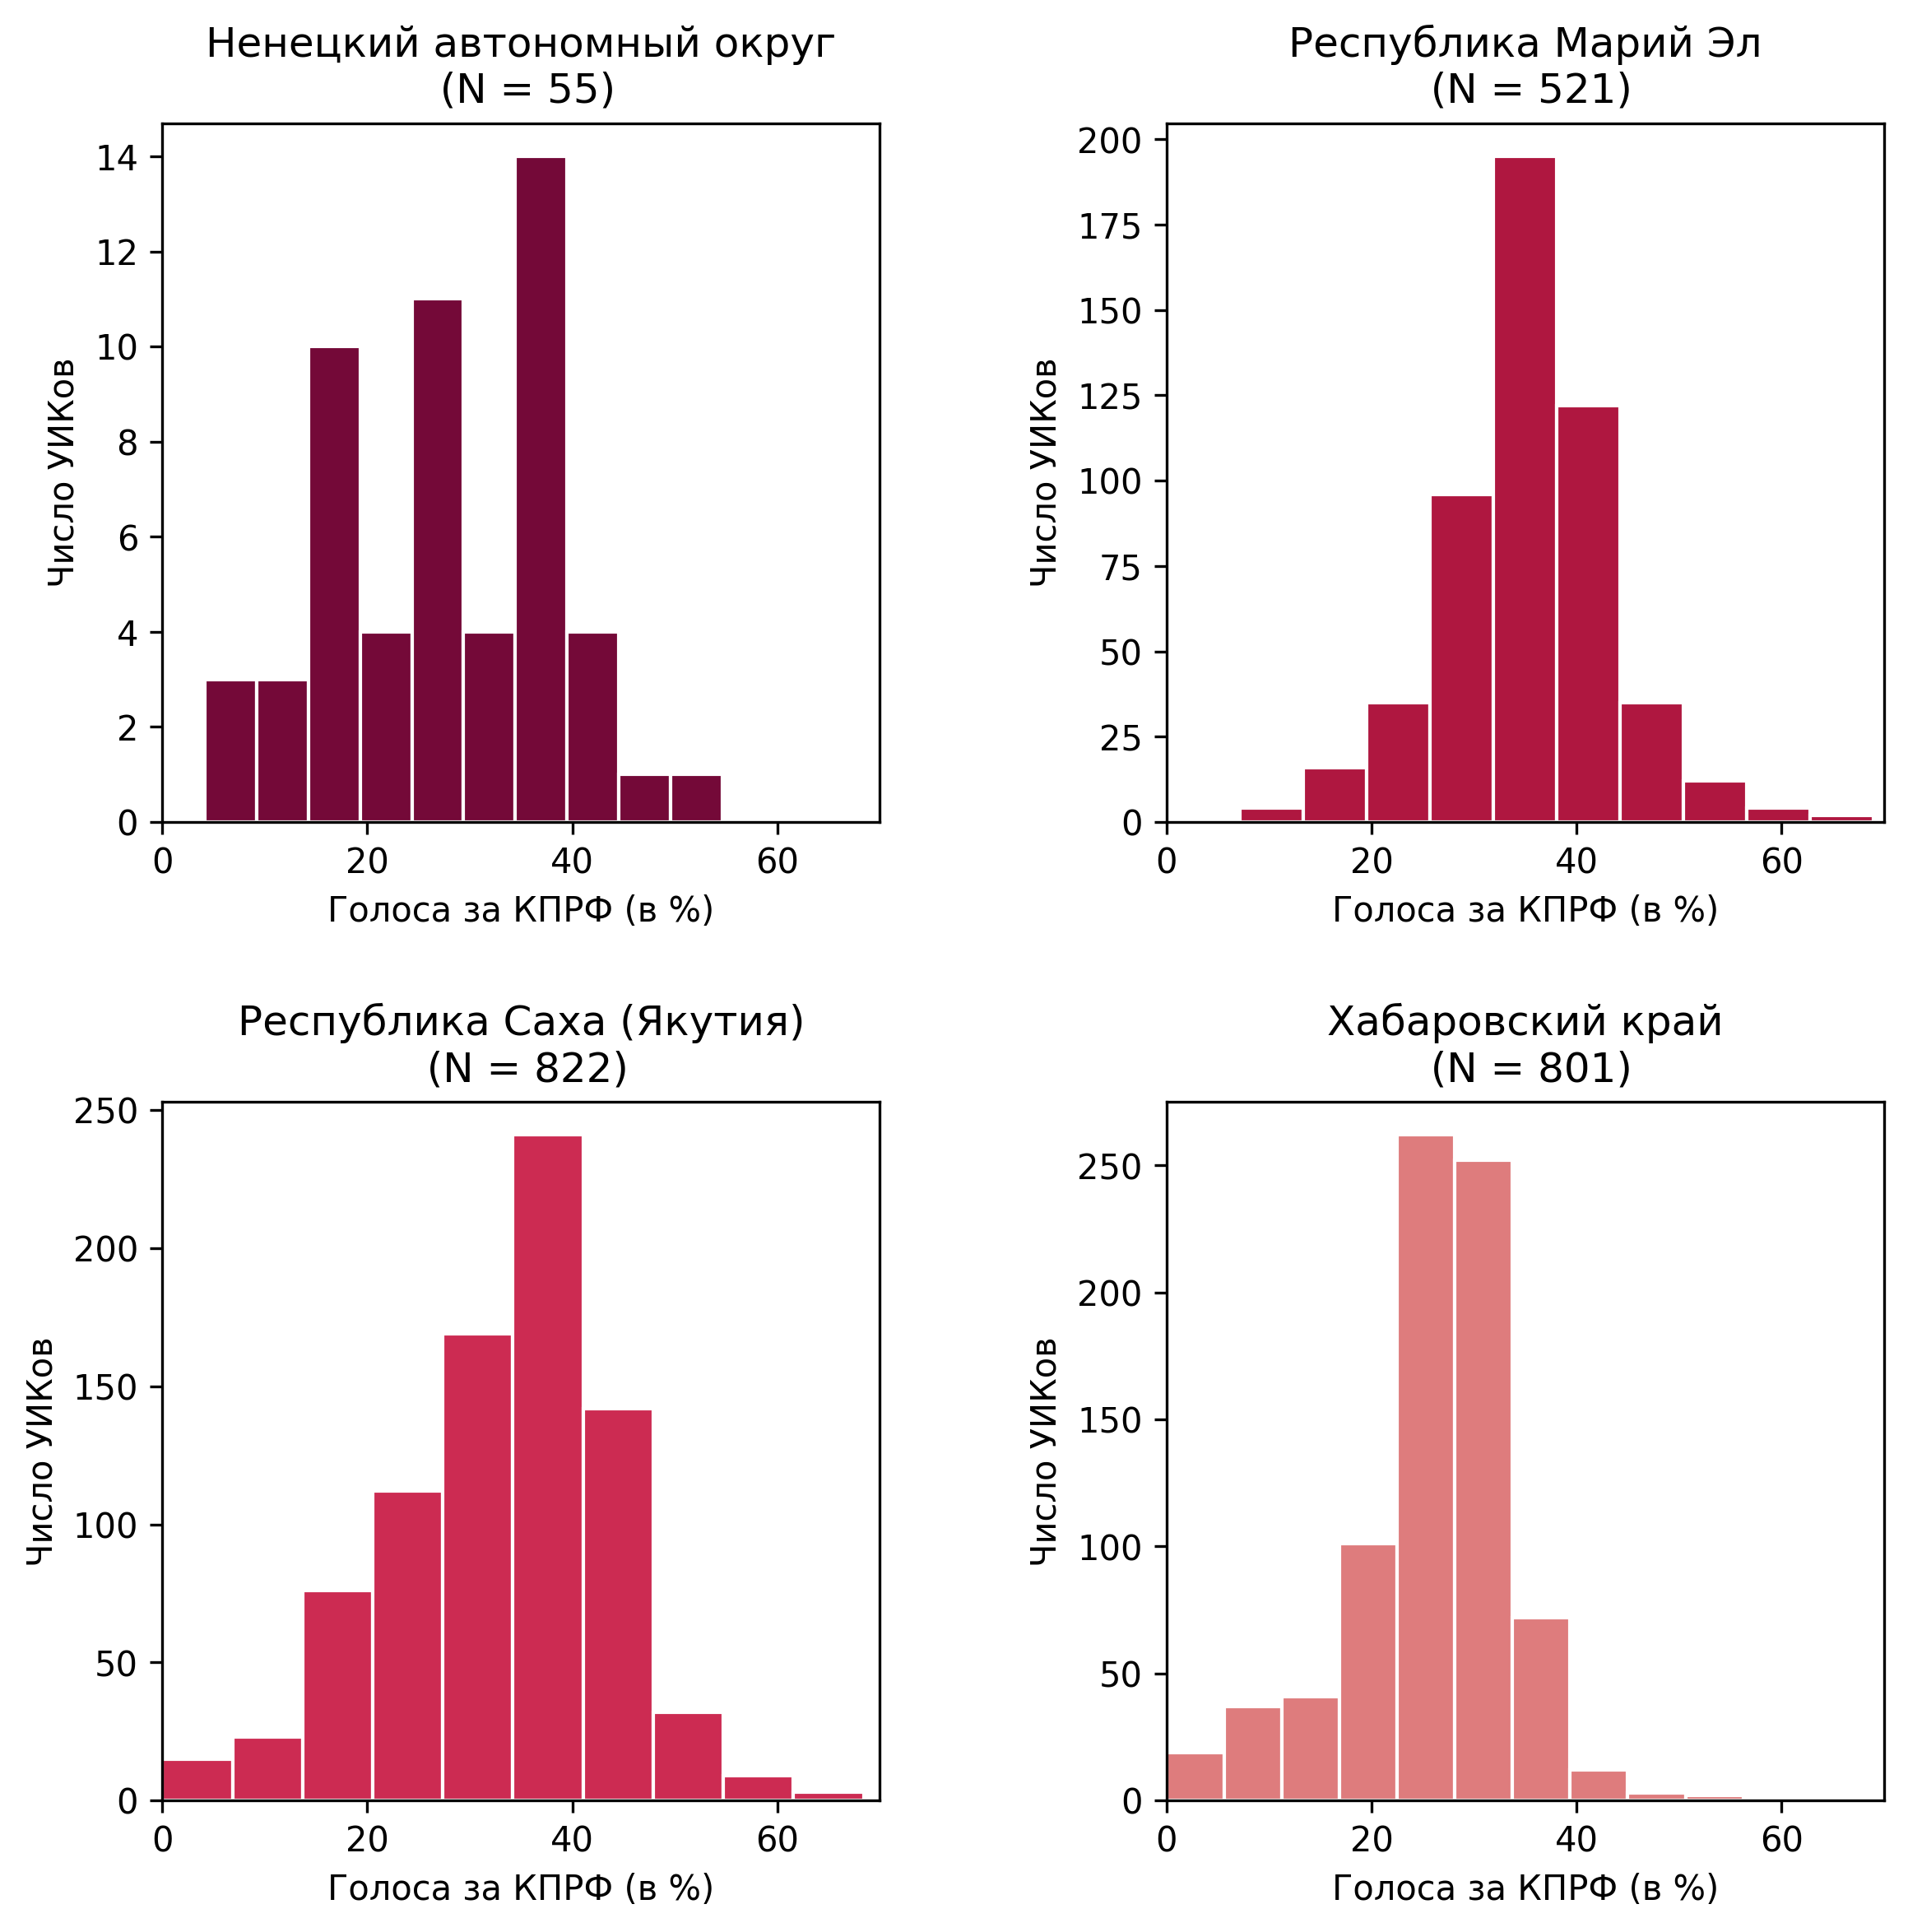

In [79]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2,
                        gridspec_kw = dict(hspace = 0.4, 
                                           wspace = 0.4))

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    data = grouped.get_group(name)
    n = len(data)
    ax.hist(data["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(f"{name}\n (N = {n})")
    ax.set_xlabel("Голоса за КПРФ (в %)")
    ax.set_ylabel("Число УИКов")
    ax.set_xlim(0, 70)

Осталось только добавить заголовок для всего графика и выгрузить результат наших стараний в файл. Так как в `axes` сохранен набор осей в виде обычного массива `numpy array`, применить к нему метод `.set_title()` по аналогии с подграфиками не получится. Понадобится метод `.suptitle()`, и применяться он должен уже к изображению `fig`:

In [ ]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2,
                        gridspec_kw = dict(hspace = 0.4, 
                                           wspace = 0.4))

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    data = grouped.get_group(name)
    n = len(data)
    ax.hist(data["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(f"{name}\n (N = {n})")
    ax.set_xlabel("Голоса за КПРФ (в %)")
    ax.set_ylabel("Число УИКов")
    ax.set_xlim(0, 70)
    
fig.suptitle("Выборы в Государственную Думу 2021", 
             fontweight = "bold");

# моя прелесть...
# все мы немножко Голлум в конце таких манипуляций с кодом
fig.savefig("my_precious.png")

В последней строчке кода выше мы выгружаем график в файл `my_precious.png`.

P.S. Обычно такие данные рассматривают не в разрезе избирательных участков, а в разрезе ТИКов, но, как группировать и суммировать голоса, мы уже знаем :) Если нас интересует только одна партия (та же задача, но другой уровень агрегирования), можно чуть-чуть поправить код выше:

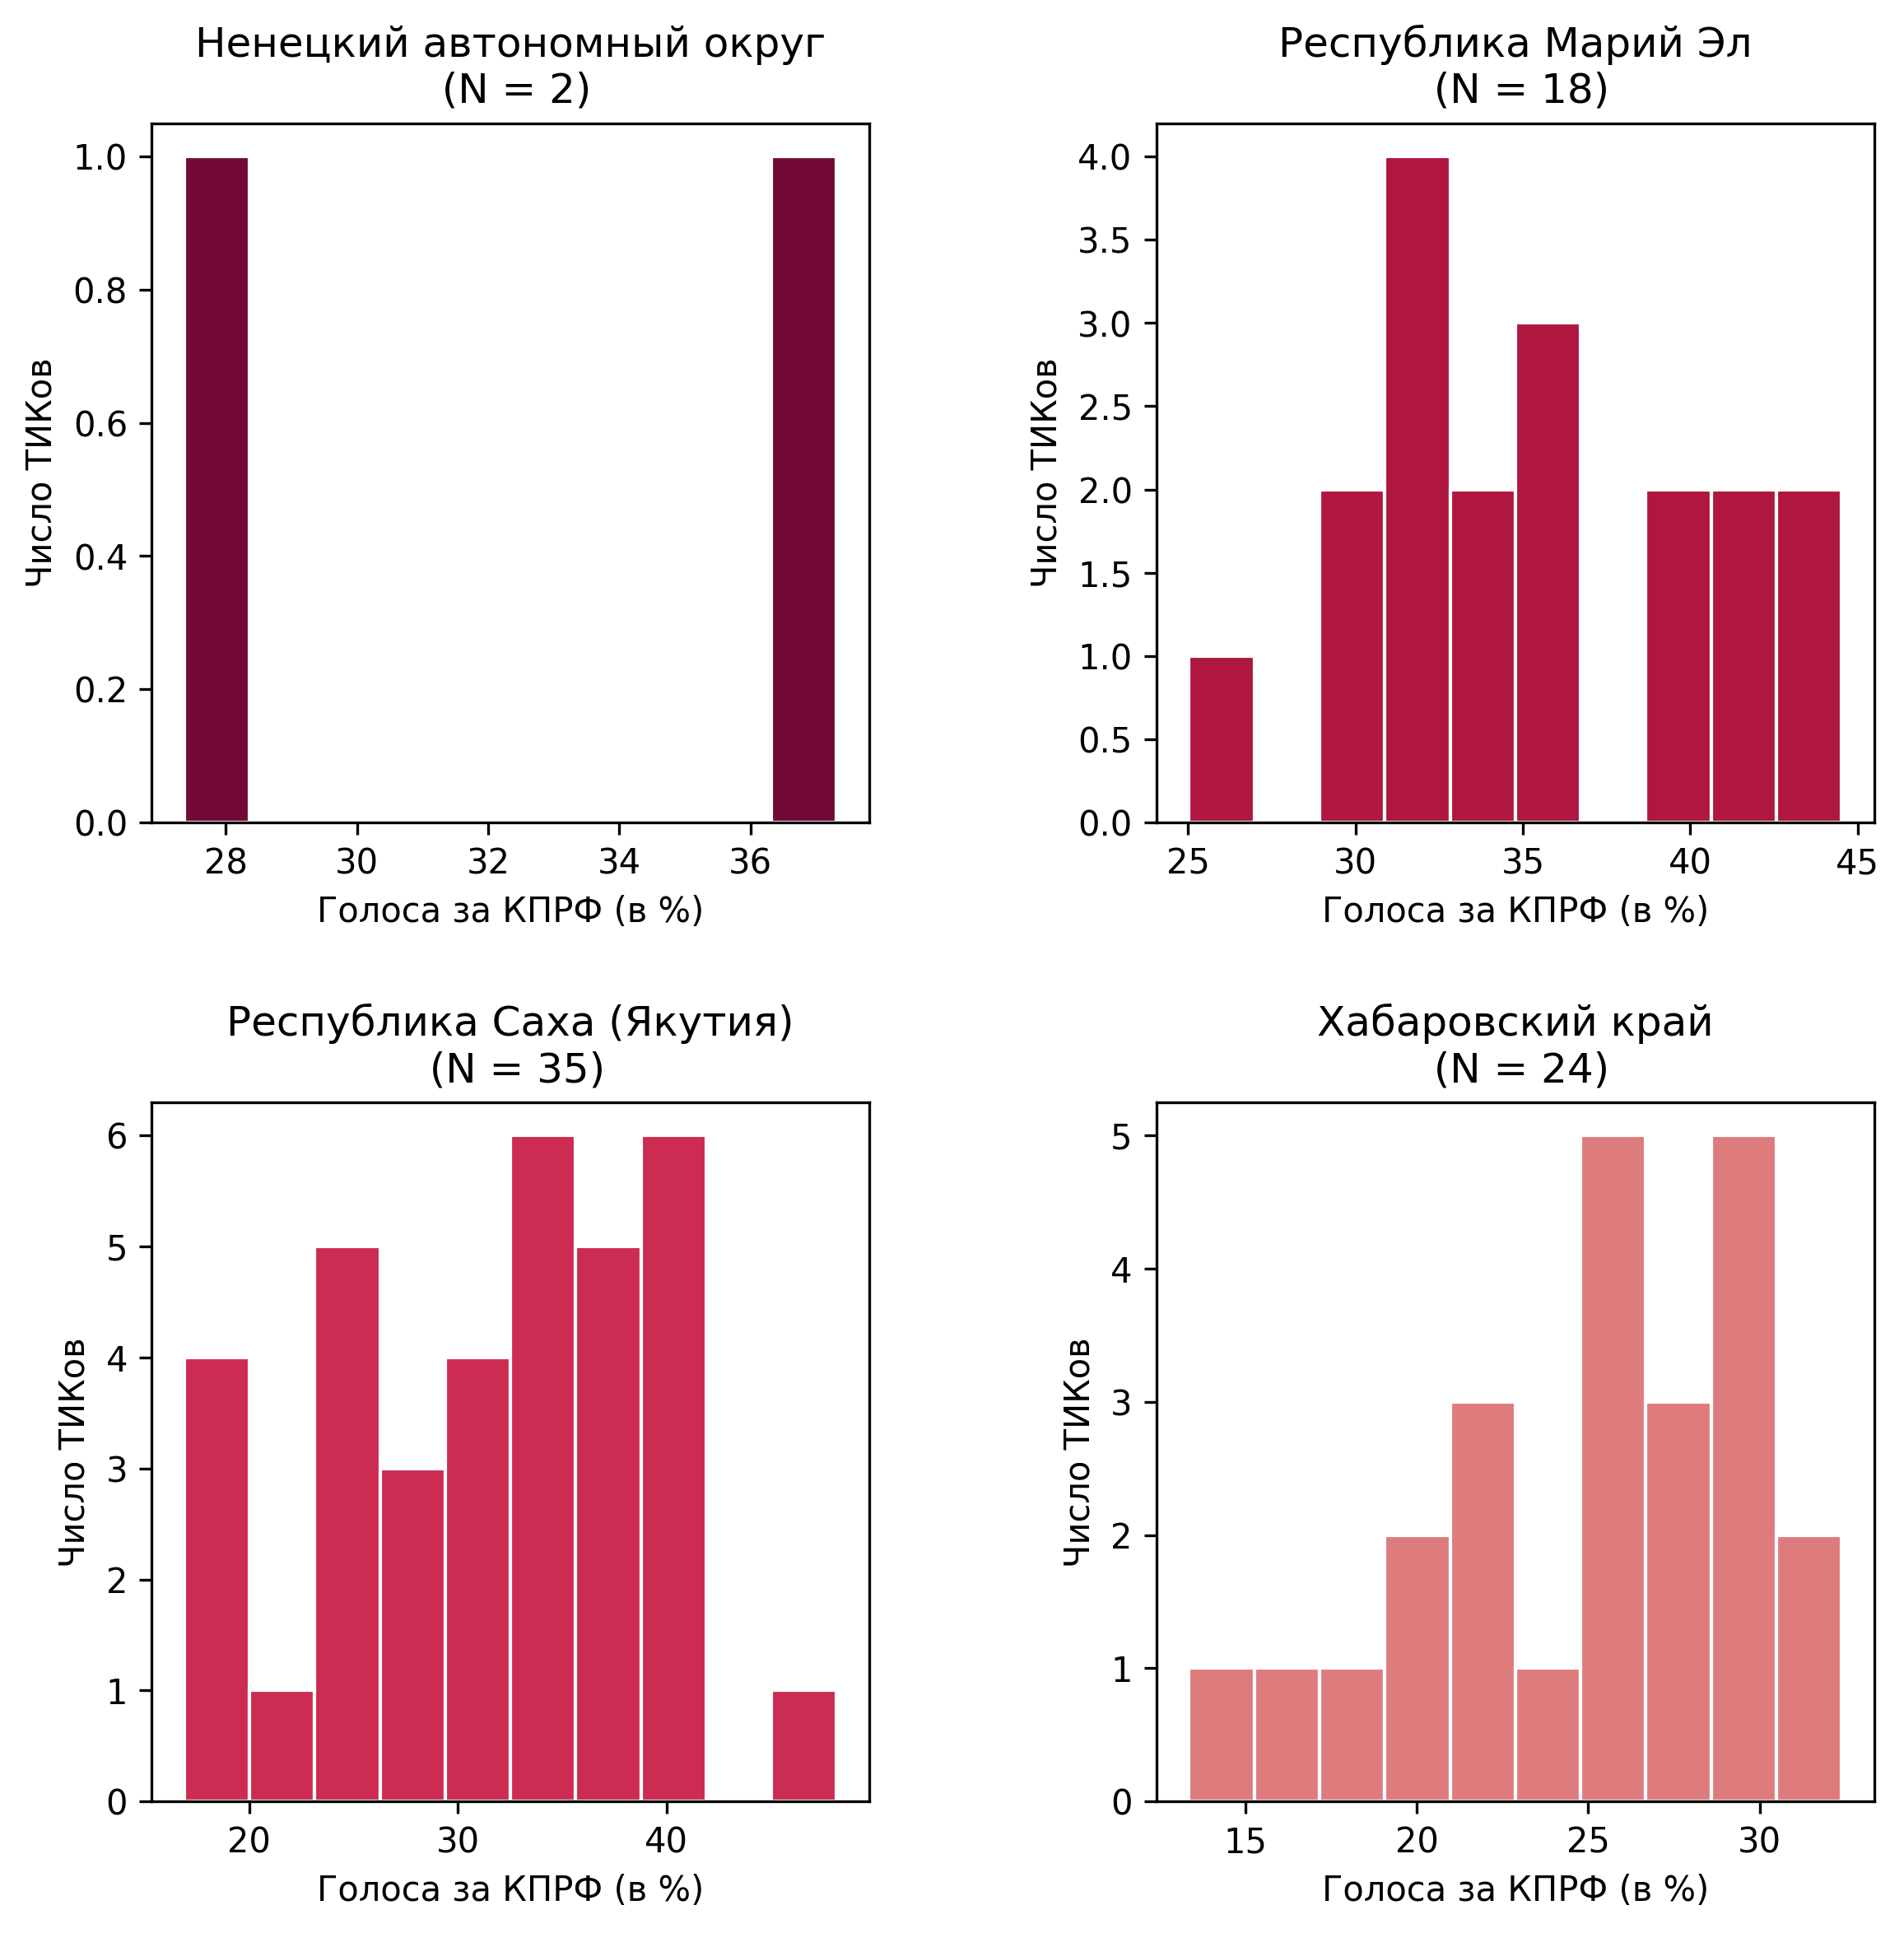

In [81]:
fig, axs = plt.subplots(figsize = (9, 9), 
                        dpi = 300, 
                        nrows = 2,
                        ncols = 2,
                        gridspec_kw = dict(hspace = 0.4, 
                                           wspace = 0.4))

for name, ax, col in zip(grouped.groups.keys(), axs.flatten(), fill):
    # группируем по ТИК в пределах каждого региона
    # суммируем и добавляем столбец с голосами в процентах
    data = grouped.get_group(name).groupby("tik").sum(numeric_only=True)
    data["КПРФ%"] = data["КПРФ"] / data["turnout"] * 100
    n = len(data)
    ax.hist(data["КПРФ%"], color = col, edgecolor = "w")
    ax.set_title(f"{name}\n (N = {n})")
    ax.set_xlabel("Голоса за КПРФ (в %)")
    ax.set_ylabel("Число ТИКов")

Однако тут небольшая проблема – в Ненецком АО только два ТИКа, поэтому для него гистограмму строить нет смысла. Можно исключить его из `grouped` и тогда уже построить три графика в одной строке. 